In [13]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV data
with open(r'/content/Accounts.csv', 'r', encoding='utf-8', errors='ignore') as data:
    data = pd.read_csv(data, engine='python', error_bad_lines=False)

# Split into groups
human_data = data[data['Class'] == 1]
bot_data = data[data['Class'] == 0]

# Significance level
alpha = 0.05

# Store features and their effect sizes
significant_features = []
non_significant_features = []
effect_sizes = []

for feature_name in data.columns[1:43]:
    feature_human = human_data[feature_name]
    feature_bot = bot_data[feature_name]

    # Perform Mann-Whitney U test
    _, p_value = stats.mannwhitneyu(feature_human, feature_bot)

    if p_value <= alpha:
        d = abs(np.mean(feature_human) - np.mean(feature_bot)) / np.sqrt((np.var(feature_human) + np.var(feature_bot)) / 2)

        if d < 0.33:
            effect_size_label = "Small"
        elif 0.33 <= d < 0.474:
            effect_size_label = "Medium"
        else:
            effect_size_label = "Large"

        significant_features.append((feature_name, p_value, d, effect_size_label))
    else:
        non_significant_features.append(feature_name)

# Print All Statistical Significant Features Results
for feature_info in significant_features:
    feature_name, p_value, d, effect_size_label = feature_info
    print(f"Feature {feature_name}:")
    print(f"P-value: {p_value}")
    print(f"Cliff's d: {d} ({effect_size_label} effect)\n")

# significant features
significant_features.sort(key=lambda x: x[2], reverse=True)
result_df = pd.DataFrame(significant_features, columns=['Feature', 'P-value', "Effect Size (Cliff's d)", 'Effect Size Label'])
result_df.to_csv('/content/Cliff Delta Test Results.csv', index=False)

<ipython-input-13-e0c19b452ff3>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(data, engine='python', error_bad_lines=False)


Feature Total Characters STD:
P-value: 0.0
Cliff's d: 1.4361625393325168 (Large effect)

Feature Total Characters Mean:
P-value: 0.0
Cliff's d: 1.3251520890001496 (Large effect)

Feature  Count Sentences STD:
P-value: 0.0
Cliff's d: 0.5047097518894644 (Large effect)

Feature Count Sentences Mean:
P-value: 2.6297706373104534e-88
Cliff's d: 0.04939977336270182 (Small effect)

Feature  Average Words Length STD:
P-value: 0.0
Cliff's d: 1.2458011862771388 (Large effect)

Feature  Count Words STD:
P-value: 0.0
Cliff's d: 1.5733522520515162 (Large effect)

Feature  Count Words Mean:
P-value: 0.0
Cliff's d: 1.233736855727159 (Large effect)

Feature  Count Unique Words STD:
P-value: 0.0
Cliff's d: 1.7722851185884885 (Large effect)

Feature  Count Unique Words Mean:
P-value: 0.0
Cliff's d: 1.321933318100912 (Large effect)

Feature  Num Uppercase Chars STD:
P-value: 0.0
Cliff's d: 1.2868695556193872 (Large effect)

Feature  Num Uppercase Chars Mean:
P-value: 3.29234217904104e-55
Cliff's d: 0.4868

In [14]:
'''
# To Plot ONlY the Significant Features
melted_data = pd.melt(data, id_vars=['Class'], value_vars=result_df['Feature'])

plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

for feature_info in significant_features:
    feature_name, _, d, _ = feature_info
    melted_data_feature = melted_data[melted_data['variable'] == feature_name]
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='variable', y='value', hue='Class', data=melted_data_feature)
    plt.text(0.5, 0.9, f"Cliff's d: {d:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    class_counts = melted_data_feature.groupby(['Class']).size().reset_index(name='Count')
    plt.xticks(rotation=0)
    plt.savefig(f'/content/Violin_Plot_{feature_name}.png')
    plt.show()
'''


'\n# To Plot ONlY the Significant Features\nmelted_data = pd.melt(data, id_vars=[\'Class\'], value_vars=result_df[\'Feature\'])\n\nplt.figure(figsize=(15, 8))\nsns.set(style="whitegrid")\n\nfor feature_info in significant_features:\n    feature_name, _, d, _ = feature_info\n    melted_data_feature = melted_data[melted_data[\'variable\'] == feature_name]\n    plt.figure(figsize=(10, 6))\n    sns.violinplot(x=\'variable\', y=\'value\', hue=\'Class\', data=melted_data_feature)\n    plt.text(0.5, 0.9, f"Cliff\'s d: {d:.4f}", horizontalalignment=\'center\', verticalalignment=\'center\', transform=plt.gca().transAxes)\n    class_counts = melted_data_feature.groupby([\'Class\']).size().reset_index(name=\'Count\')\n    plt.xticks(rotation=0)\n    plt.savefig(f\'/content/Violin_Plot_{feature_name}.png\')\n    plt.show()\n'

In [15]:
print("Non-Significant Features:\n")
for feature_name in non_significant_features:
    print(f"{feature_name}")

Non-Significant Features:

Average Words Length Mean
Gunning Fog STD
Gunning Fog Mean


<Figure size 1500x800 with 0 Axes>

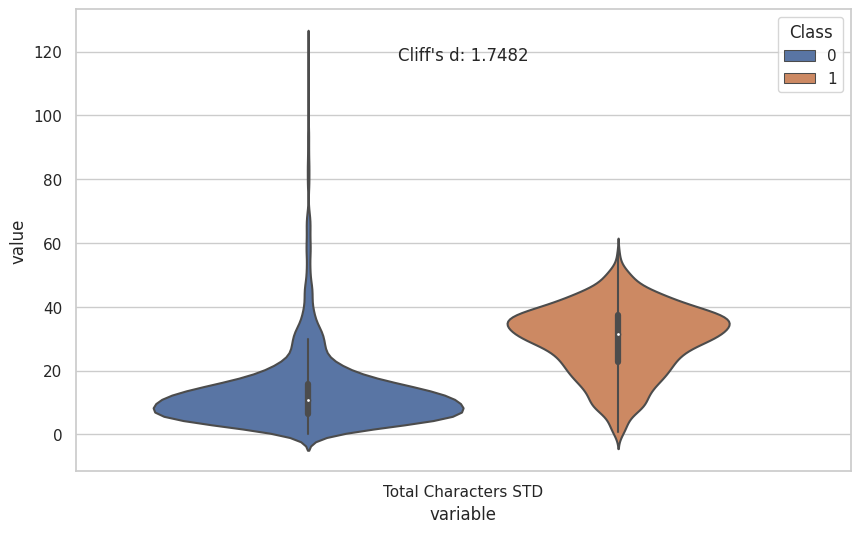

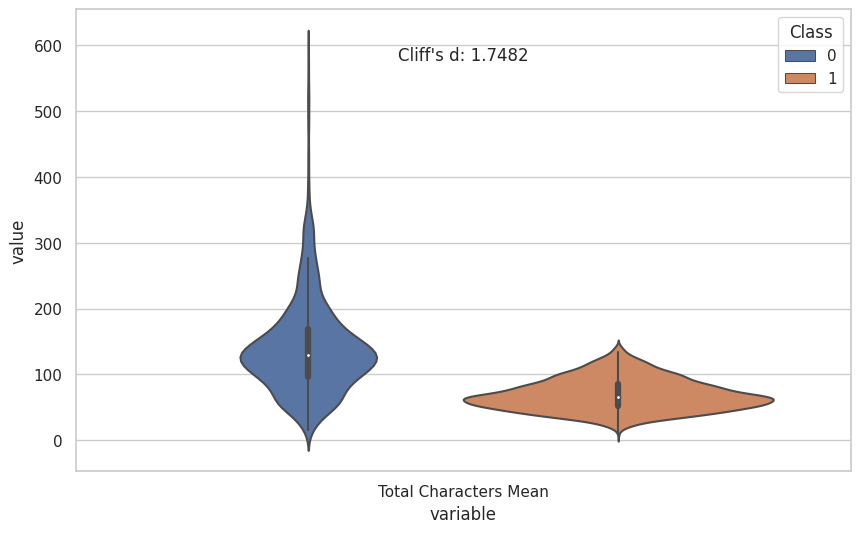

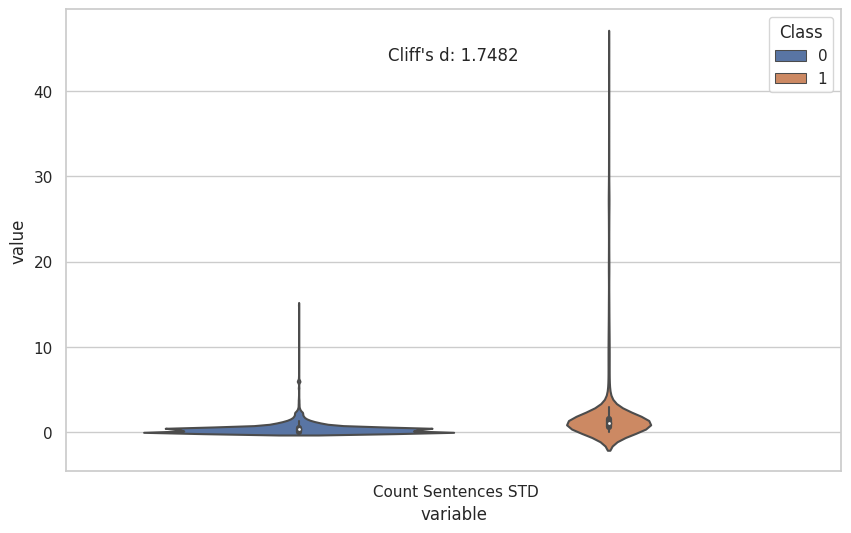

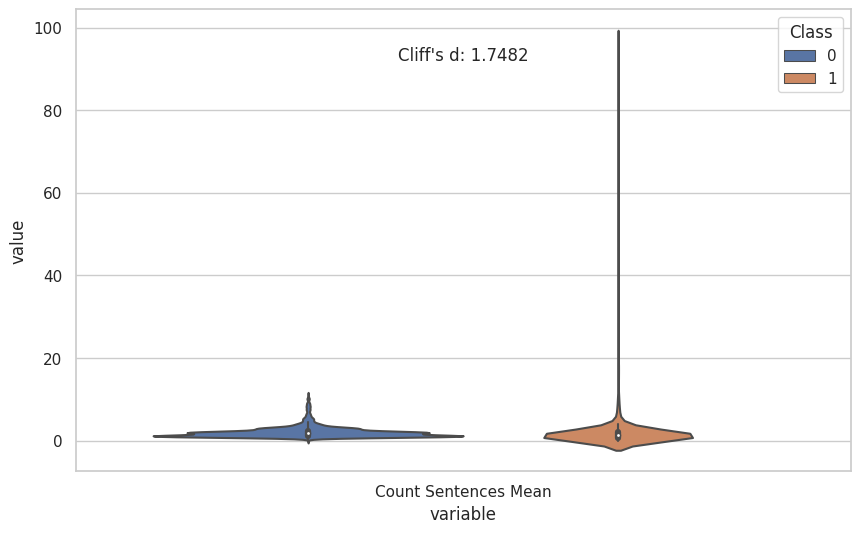

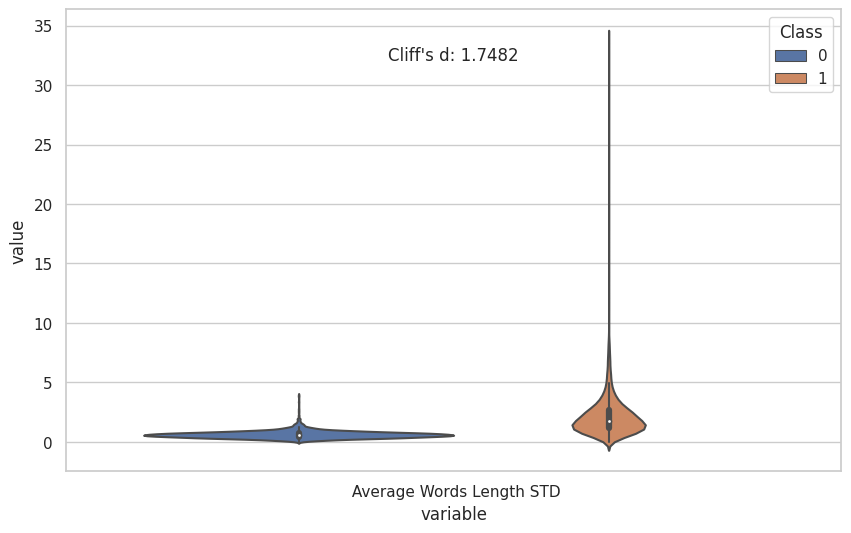

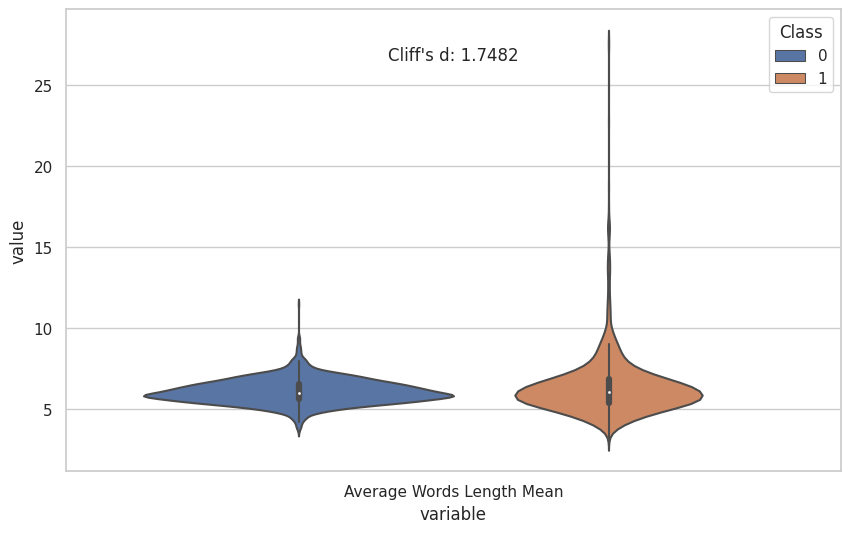

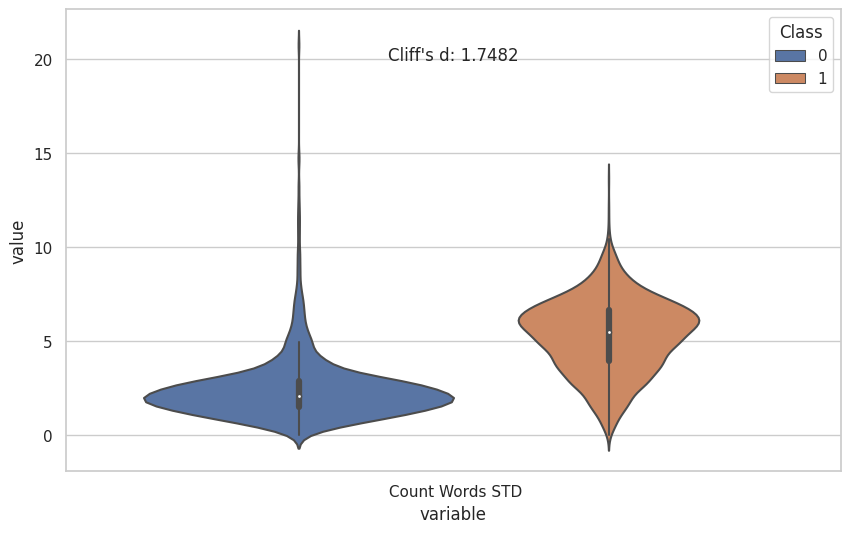

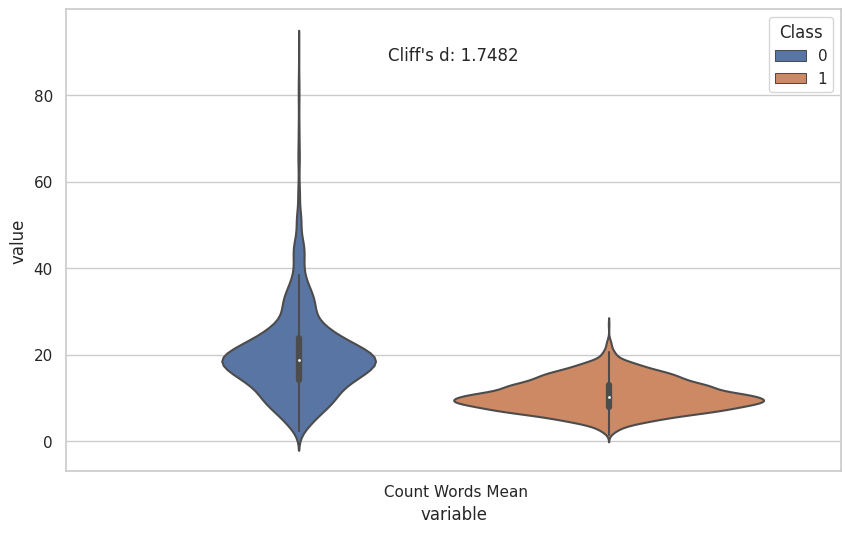

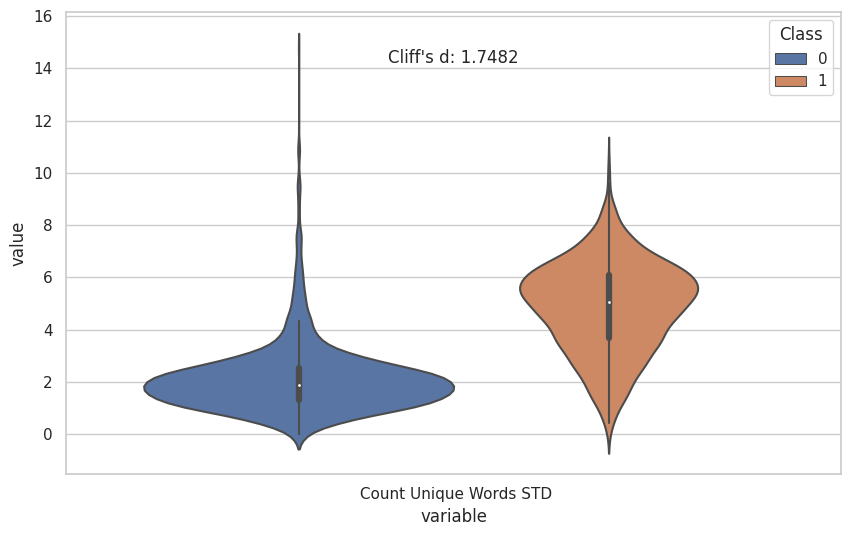

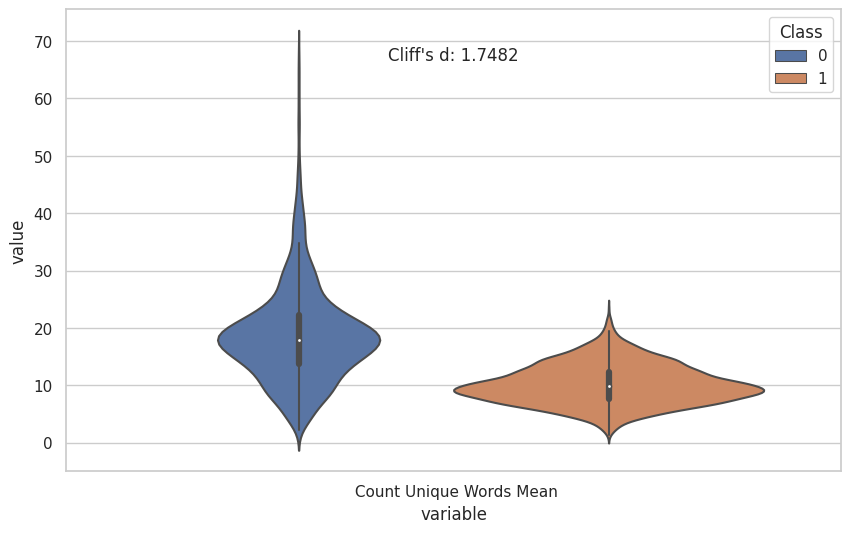

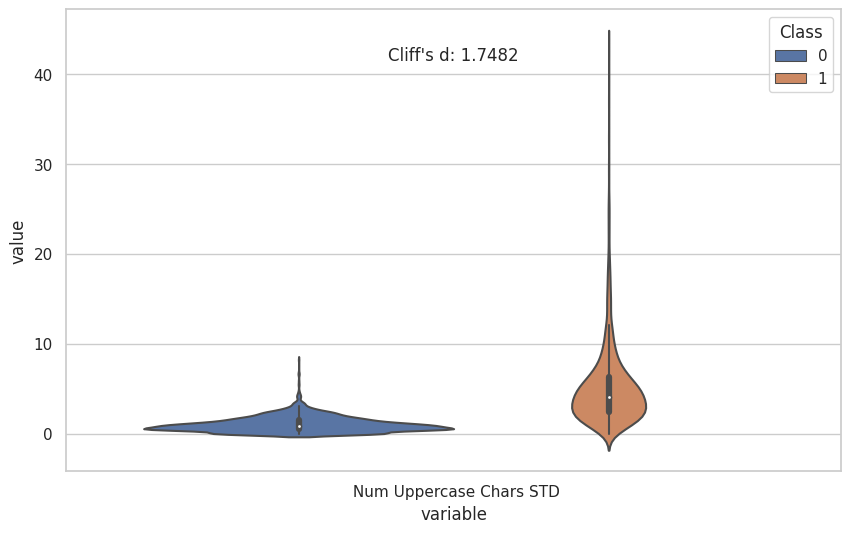

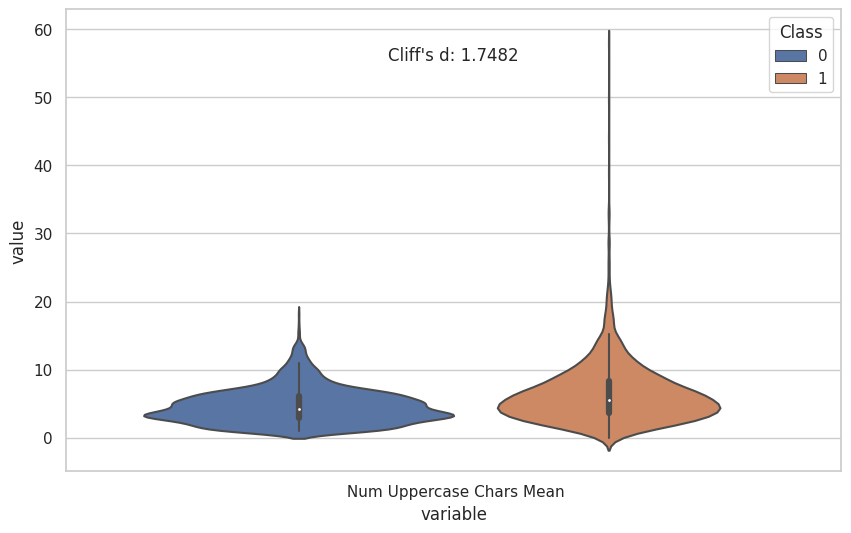

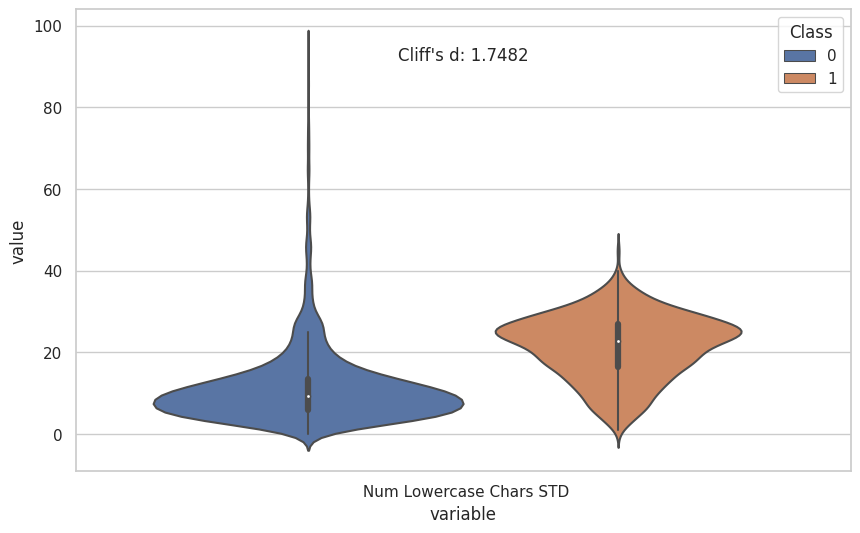

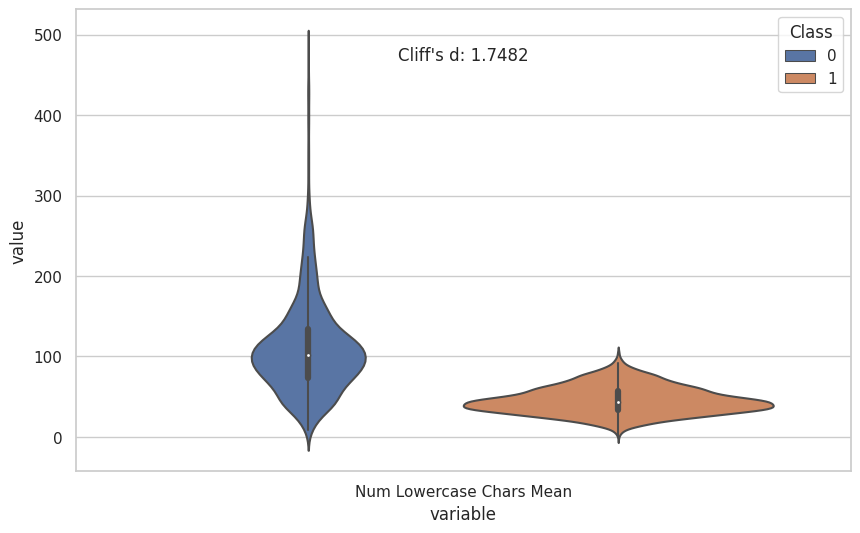

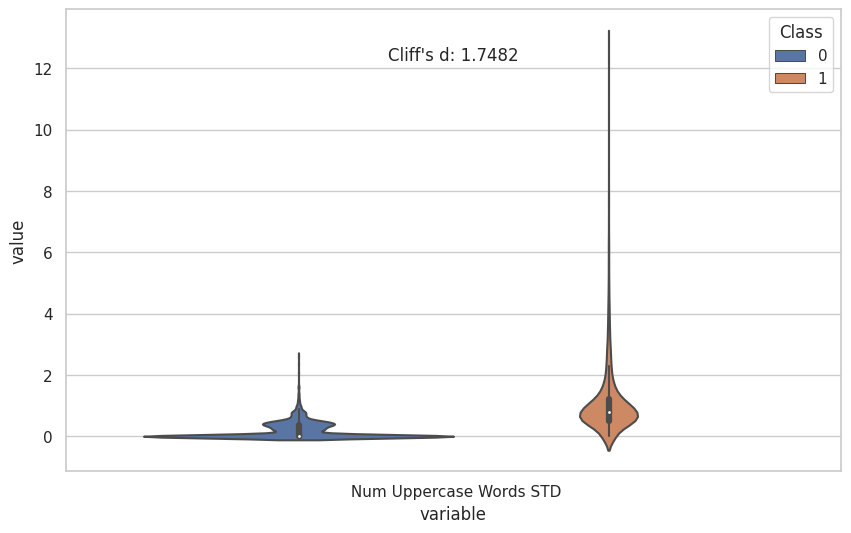

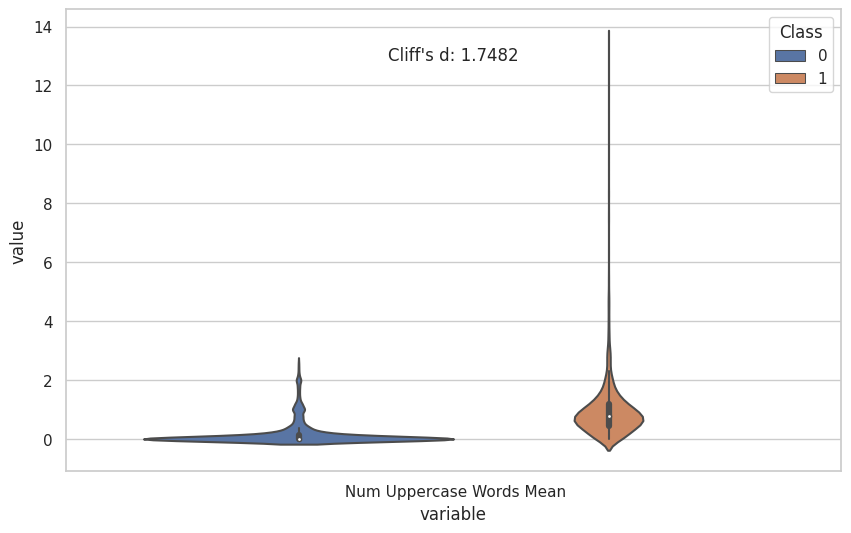

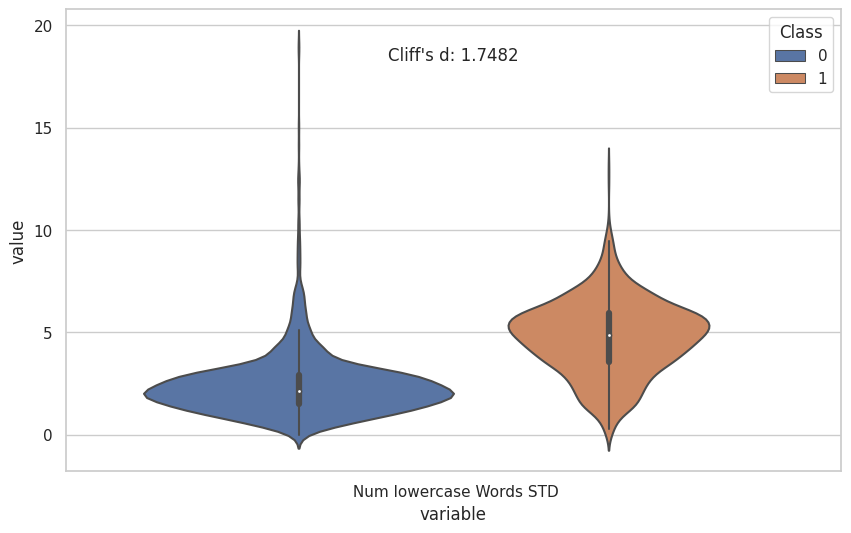

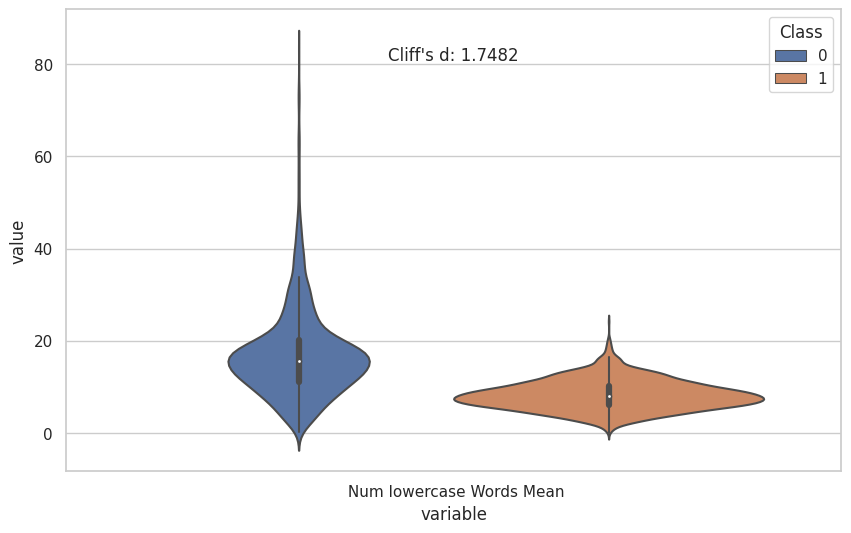

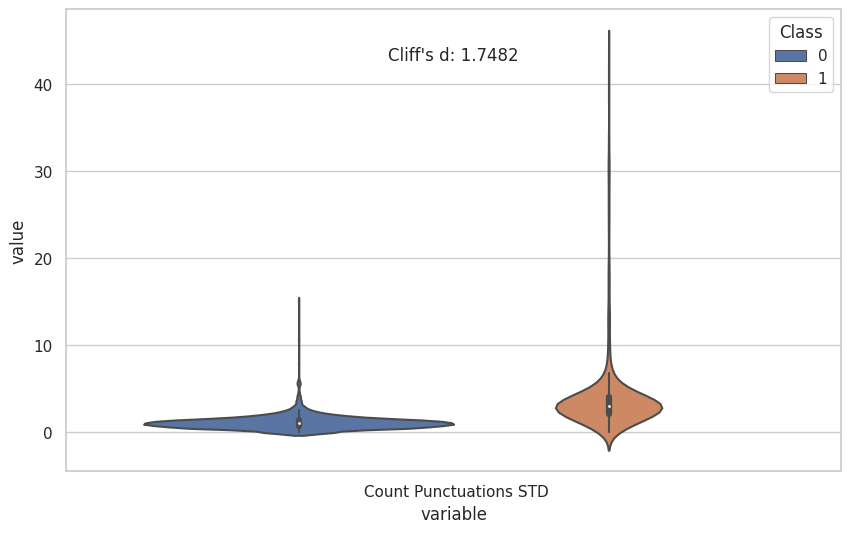

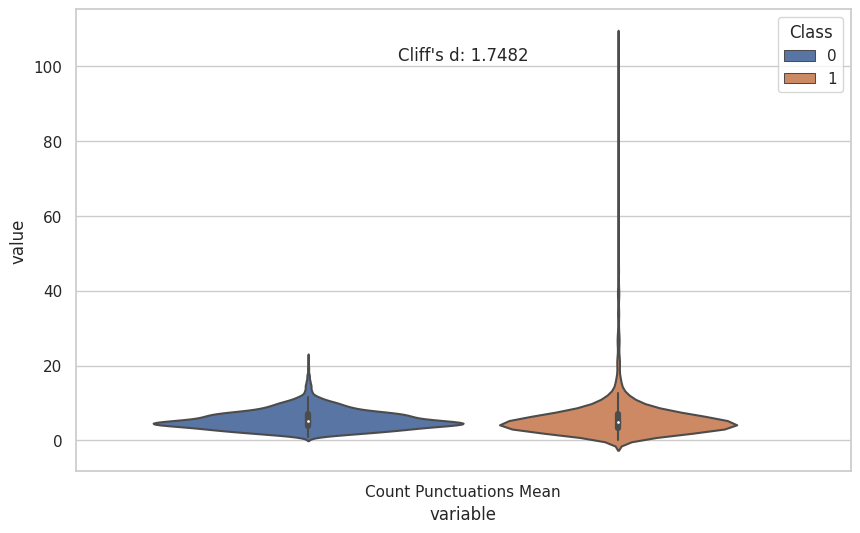

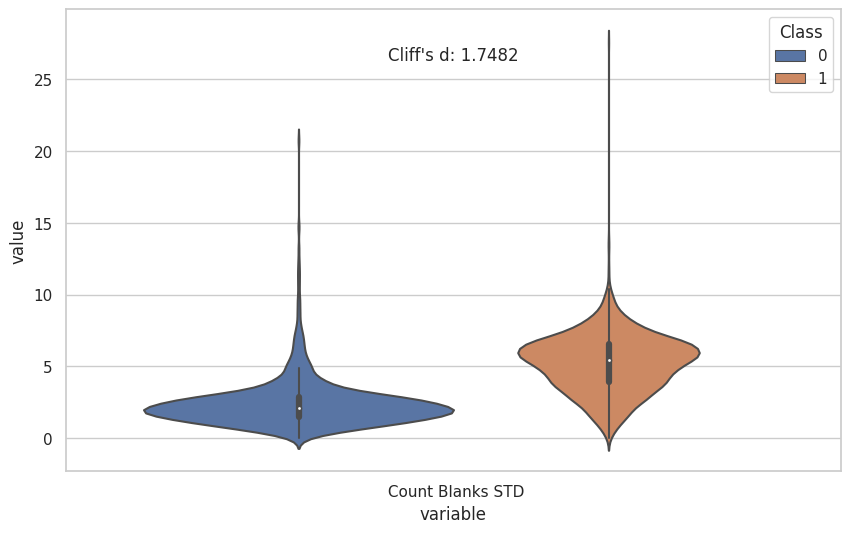

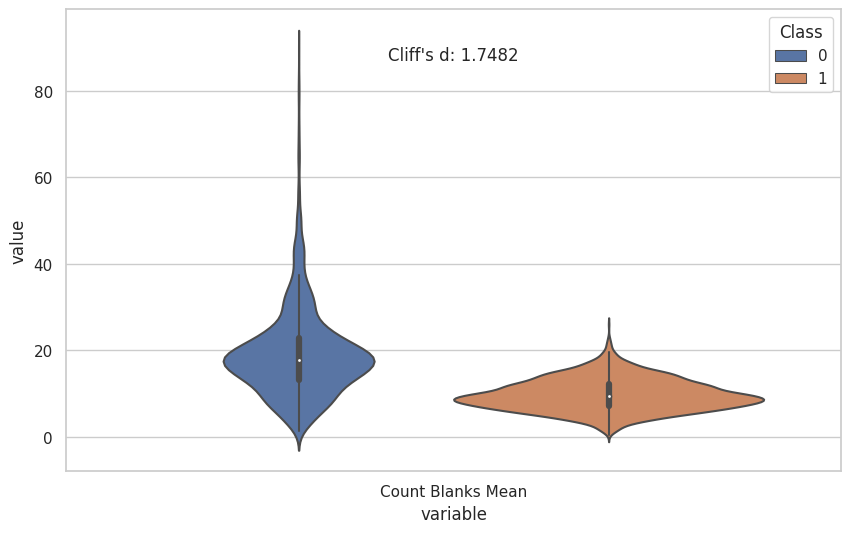

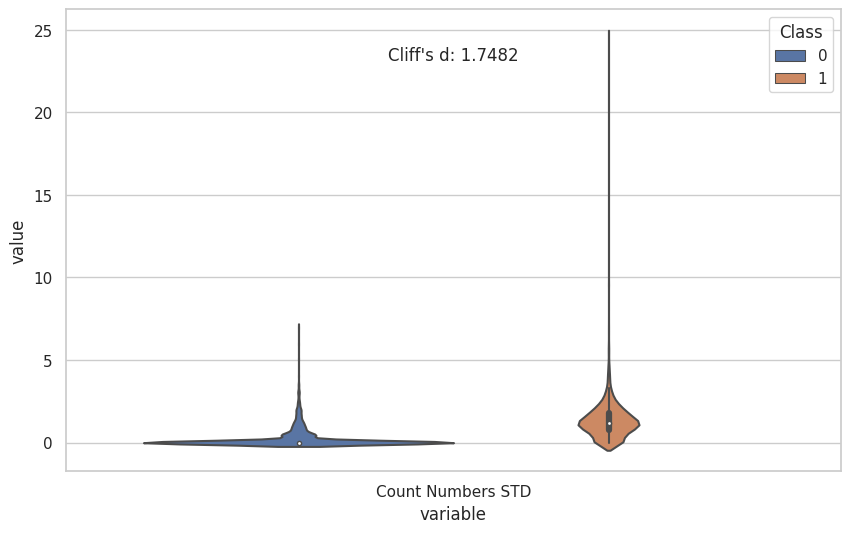

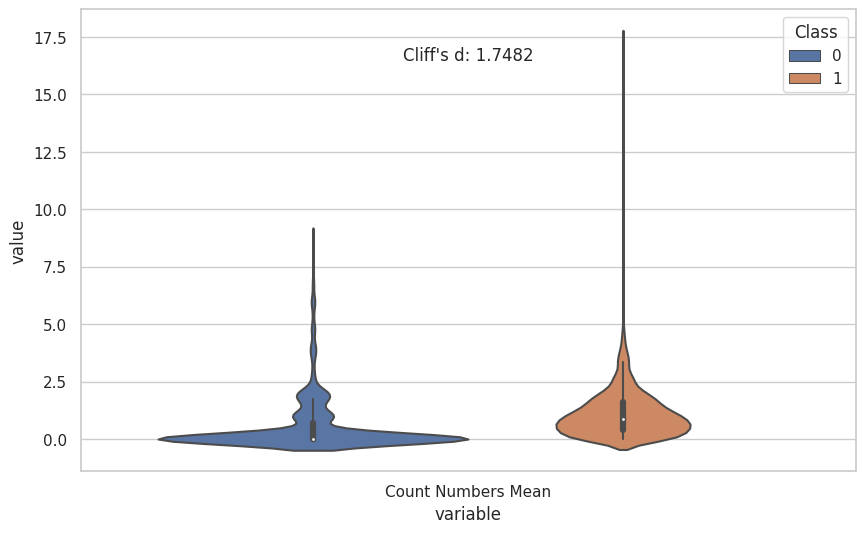

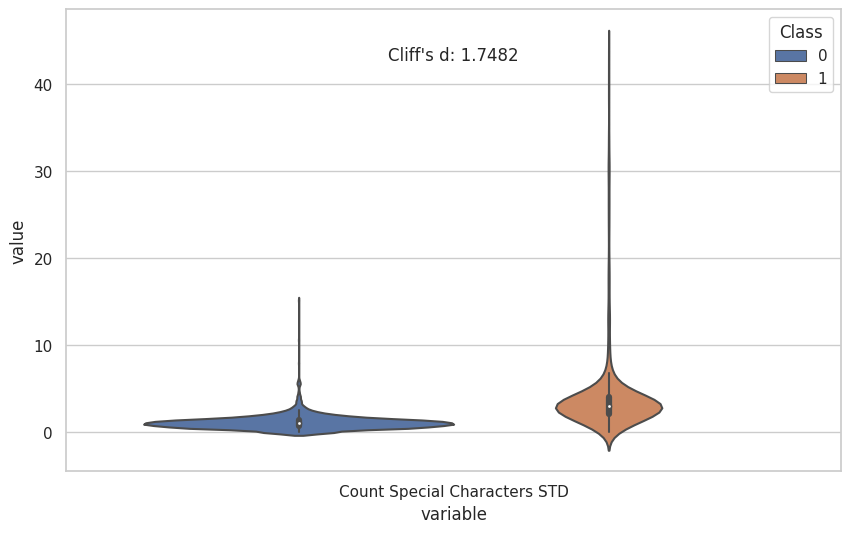

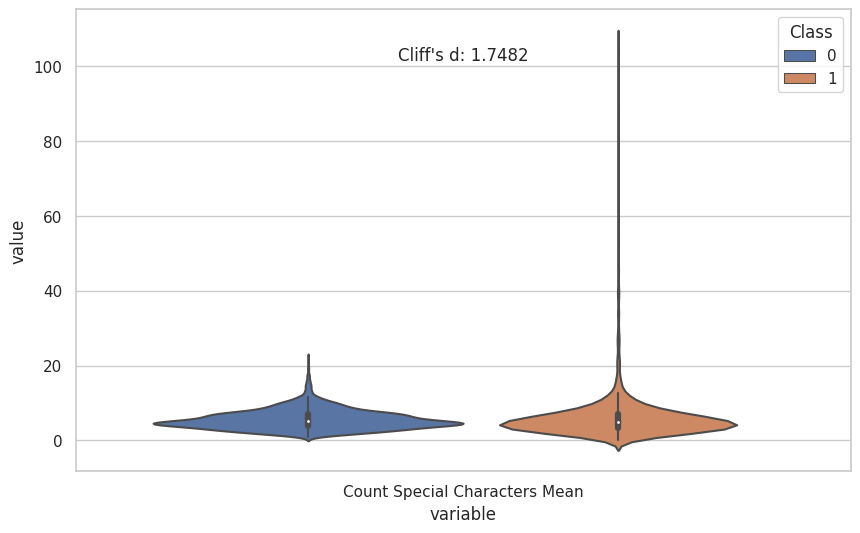

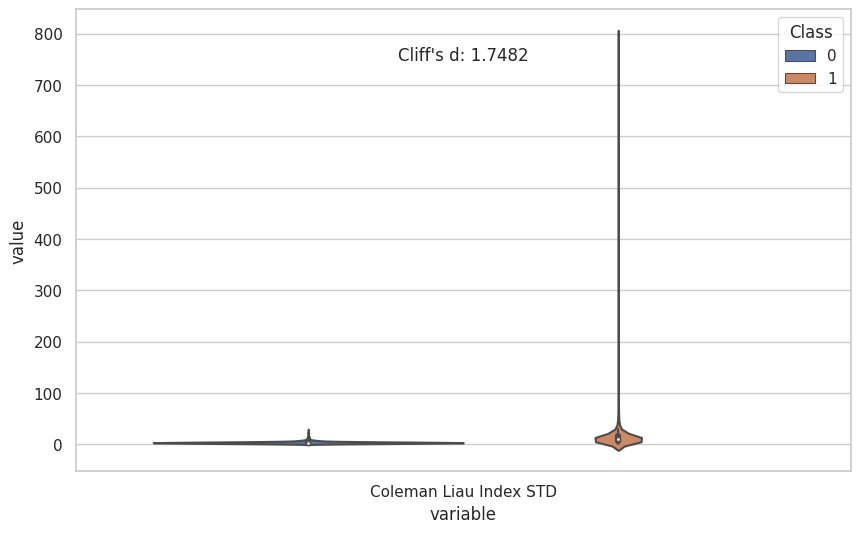

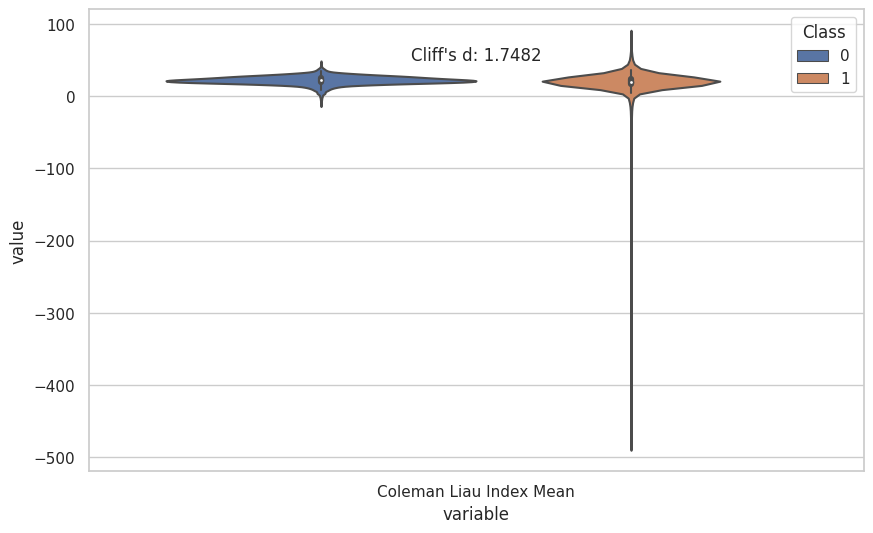

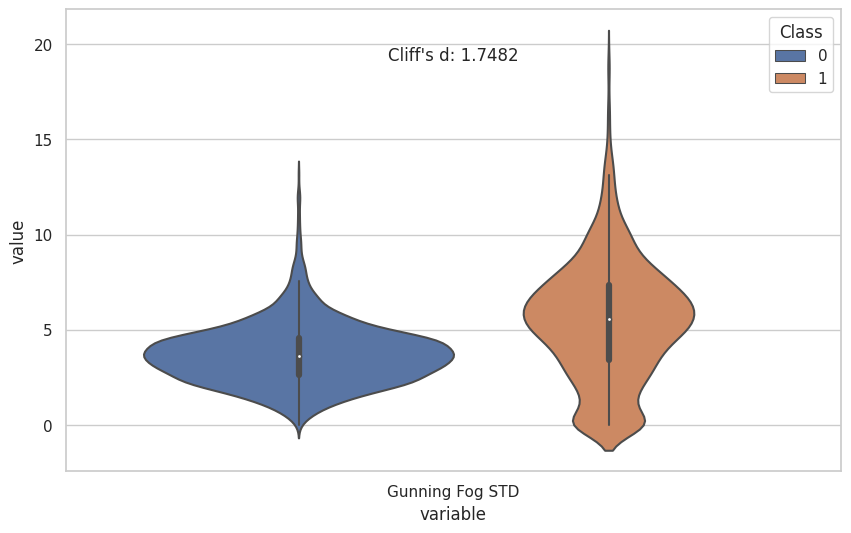

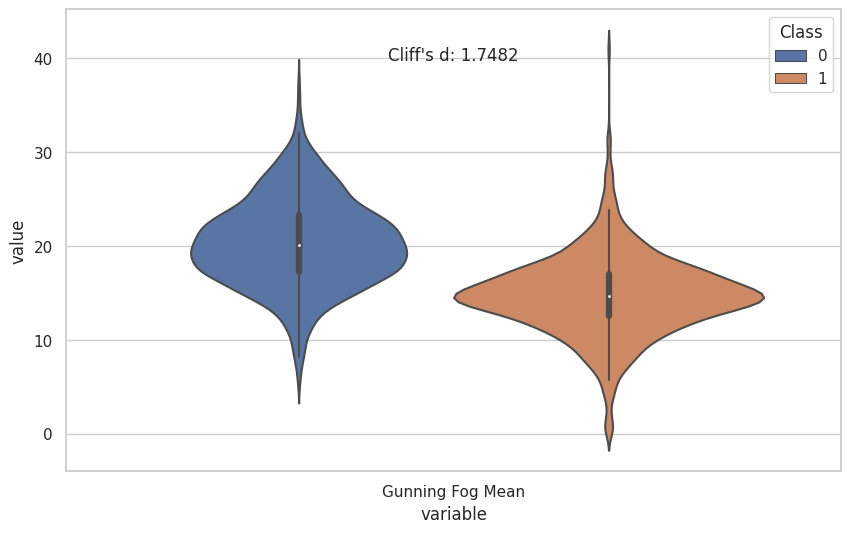

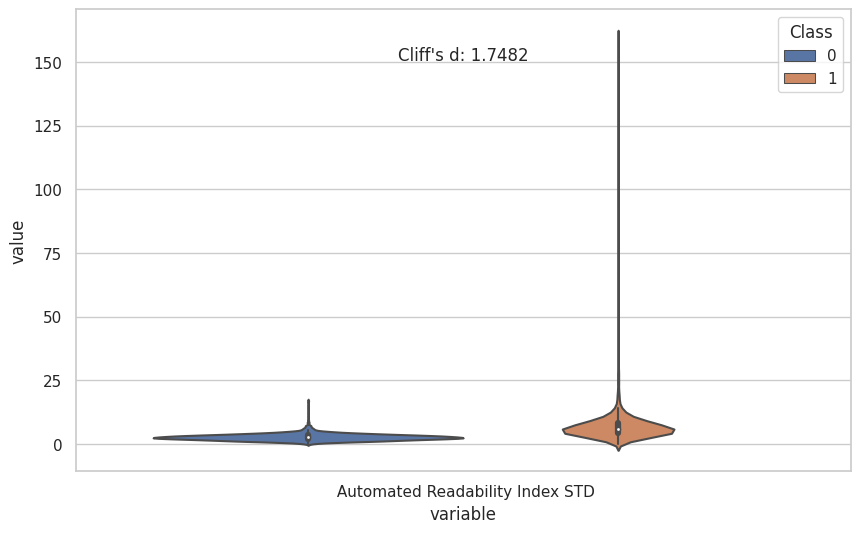

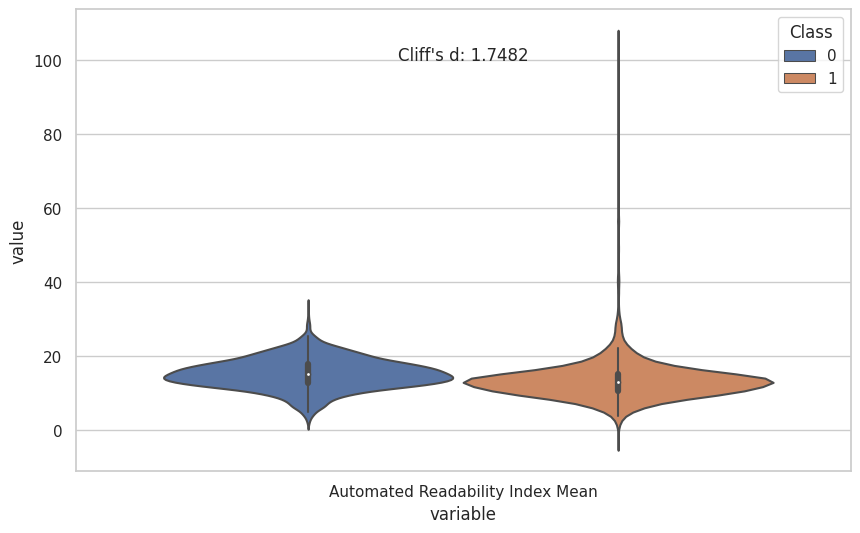

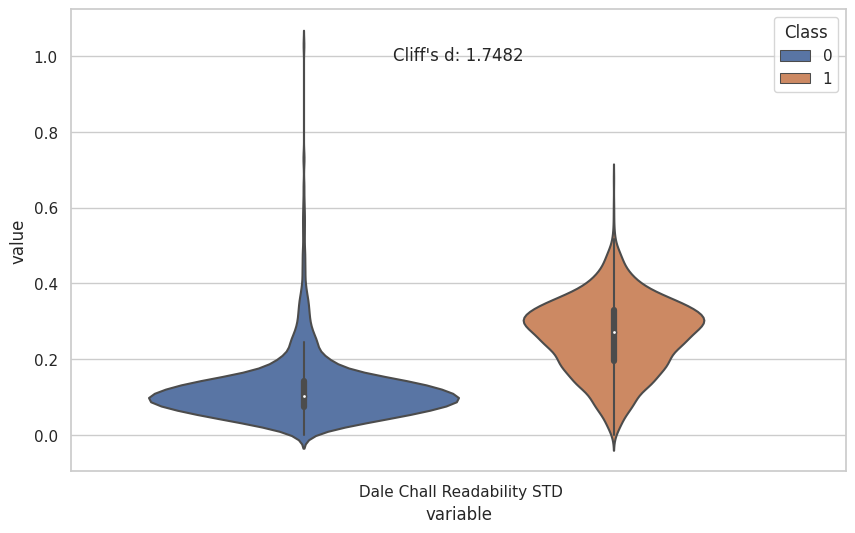

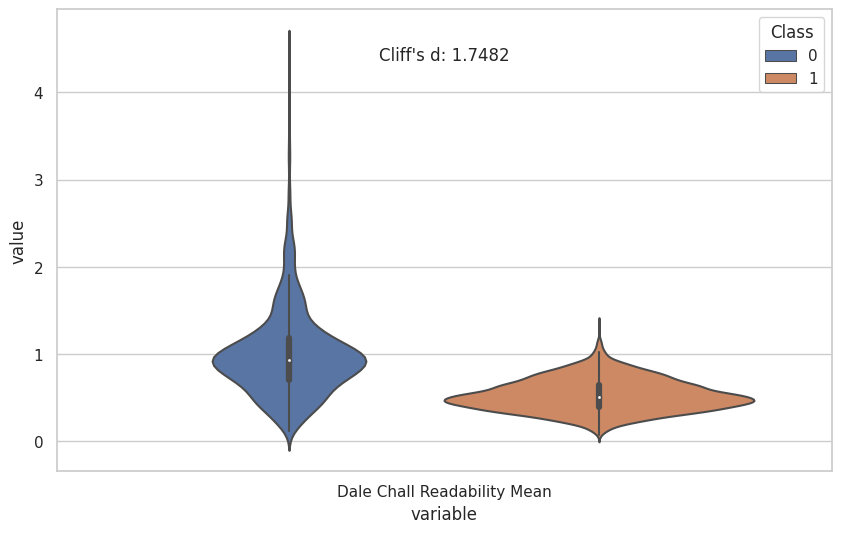

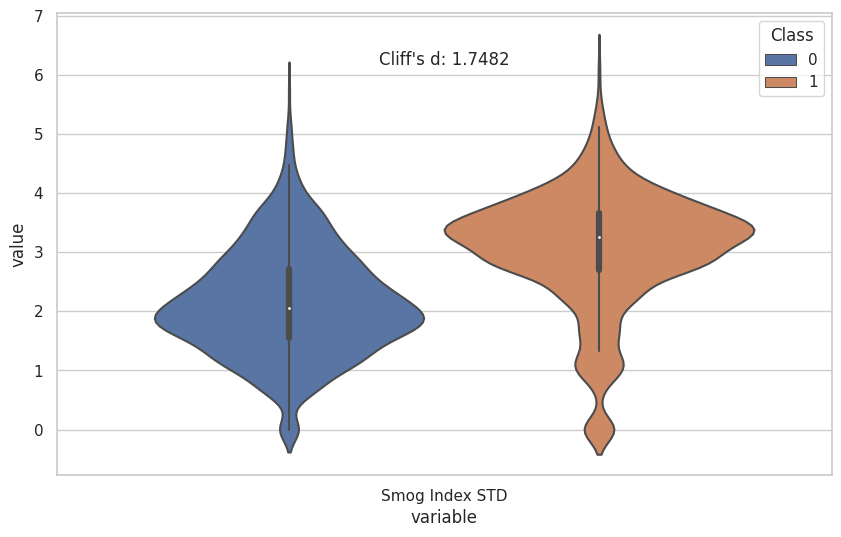

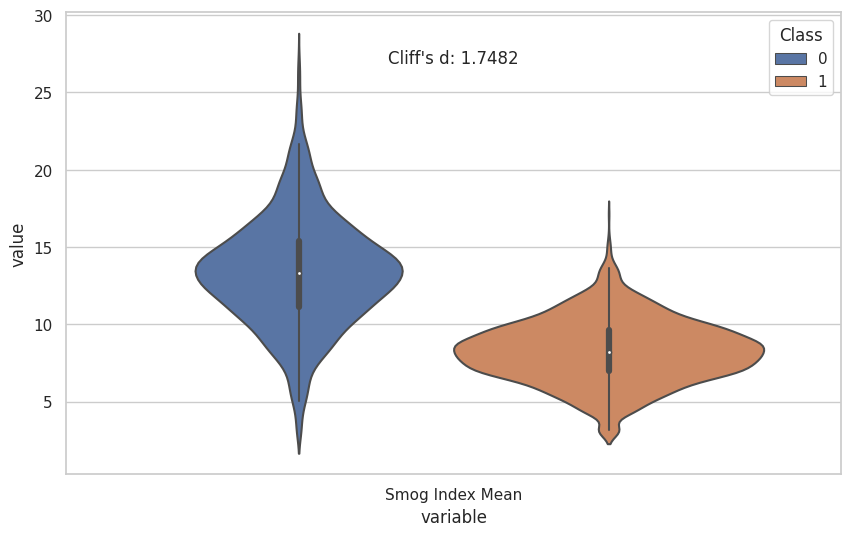

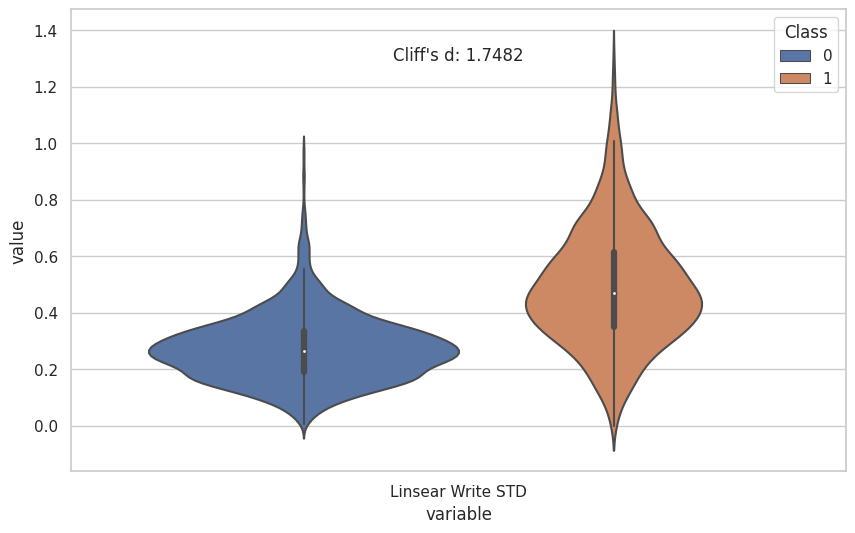

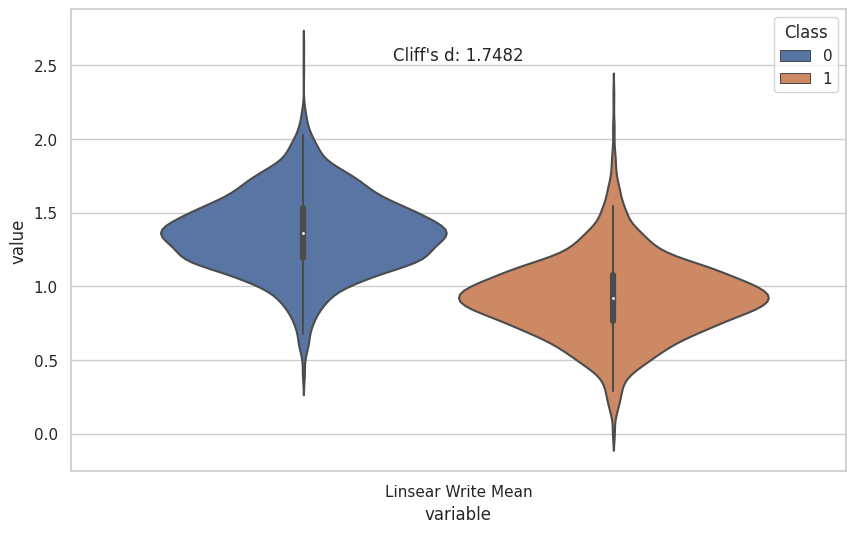

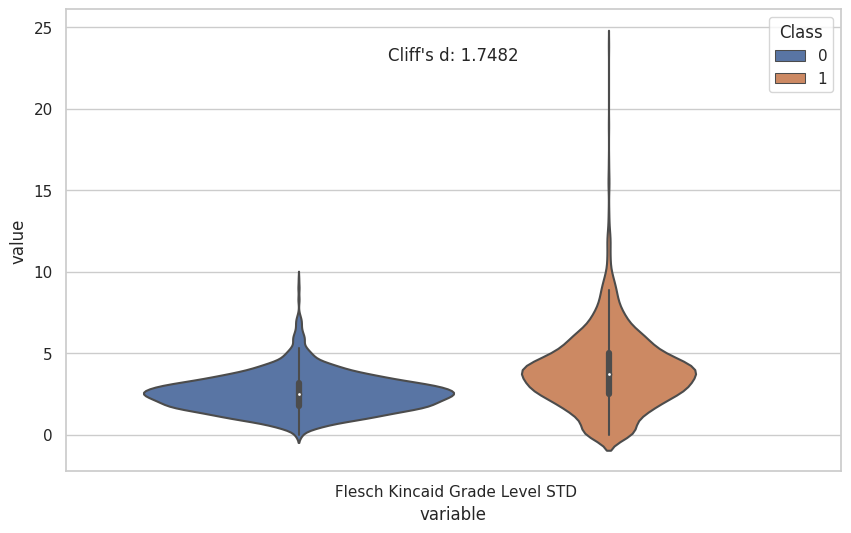

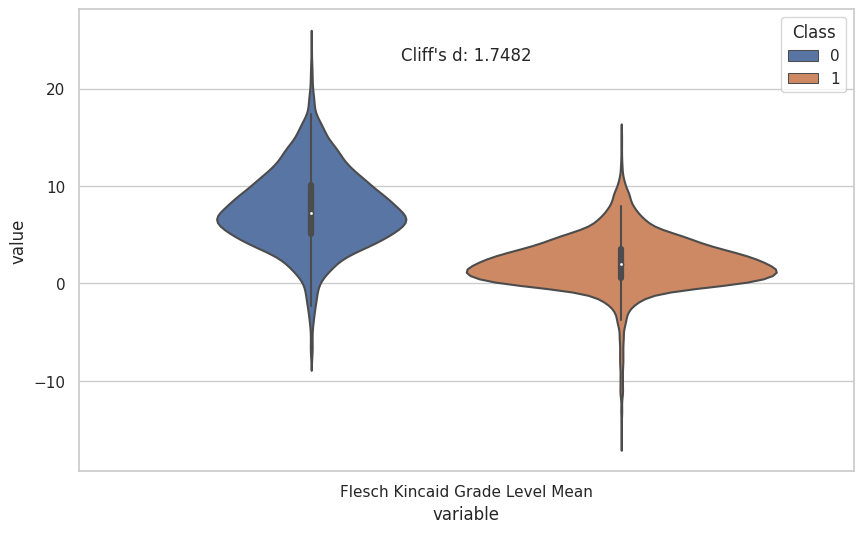

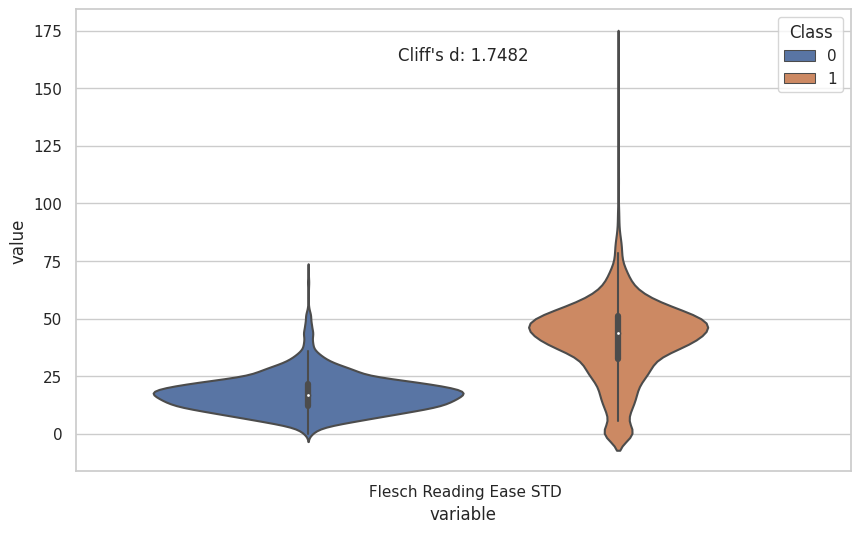

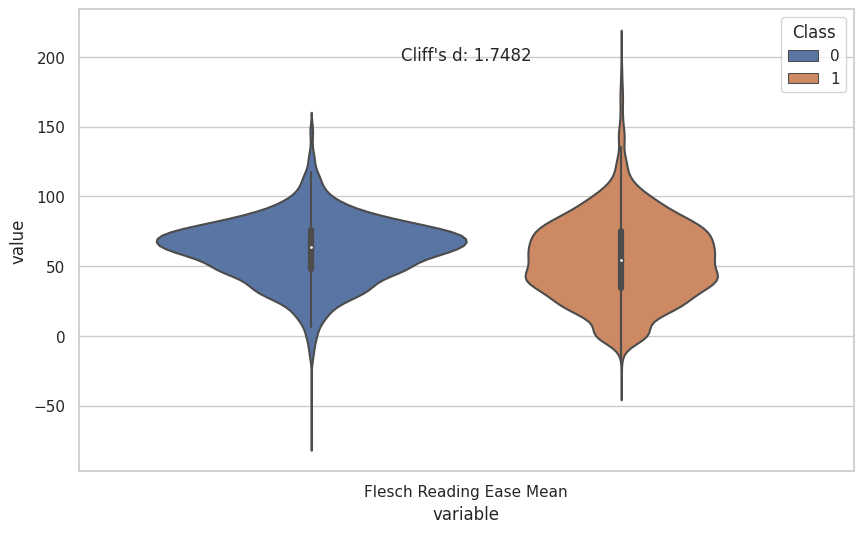

In [18]:
# To Plot ALL the 42 Features

melted_data = pd.melt(data, id_vars=['Class'], value_vars=data.columns[1:43])
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

for feature_name in data.columns[1:43]:
    melted_data_feature = melted_data[melted_data['variable'] == feature_name]
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='variable', y='value', hue='Class', data=melted_data_feature)
    plt.text(0.5, 0.9, f"Cliff's d: {d:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    class_counts = melted_data_feature.groupby(['Class']).size().reset_index(name='Count')
    plt.xticks(rotation=0)
    plt.savefig(f'/content/Violin_Plot_{feature_name}.png')
    plt.show()



<Figure size 1500x800 with 0 Axes>

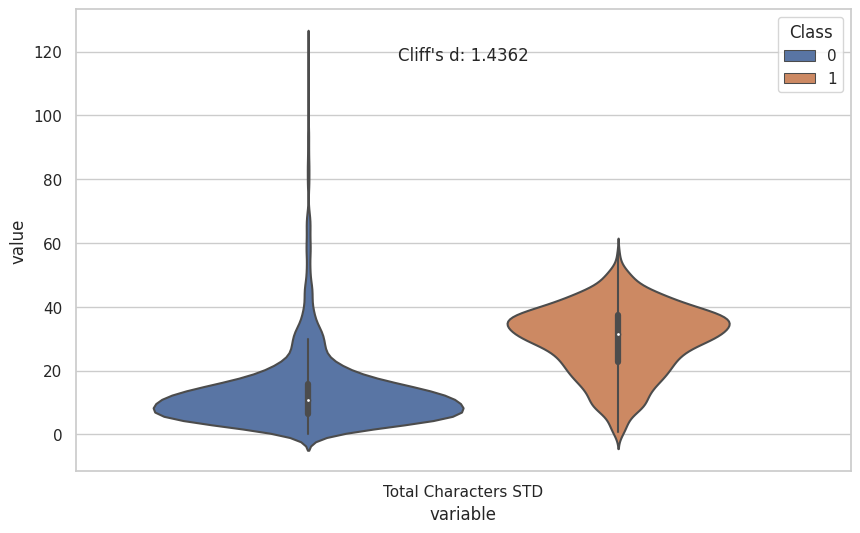

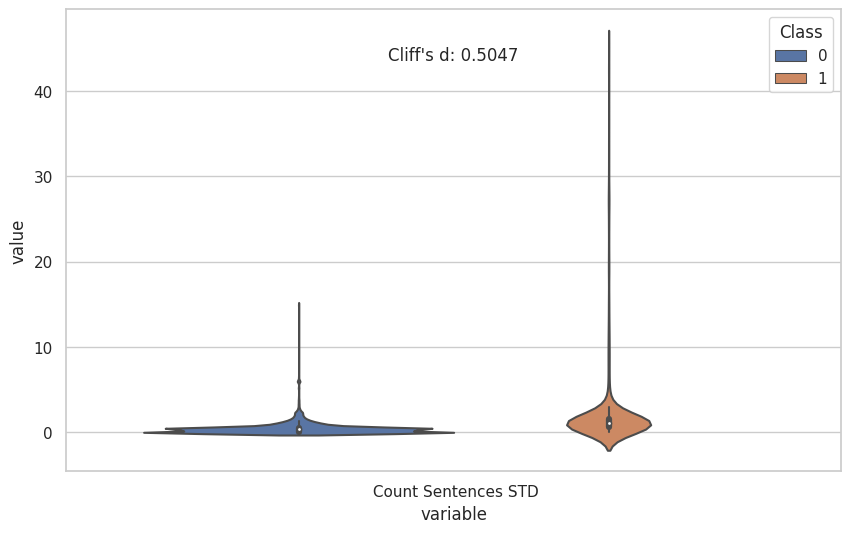

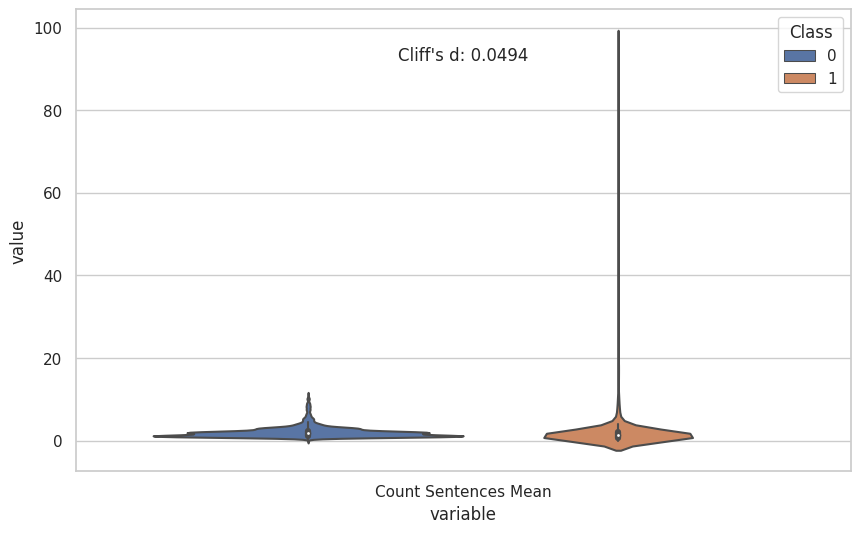

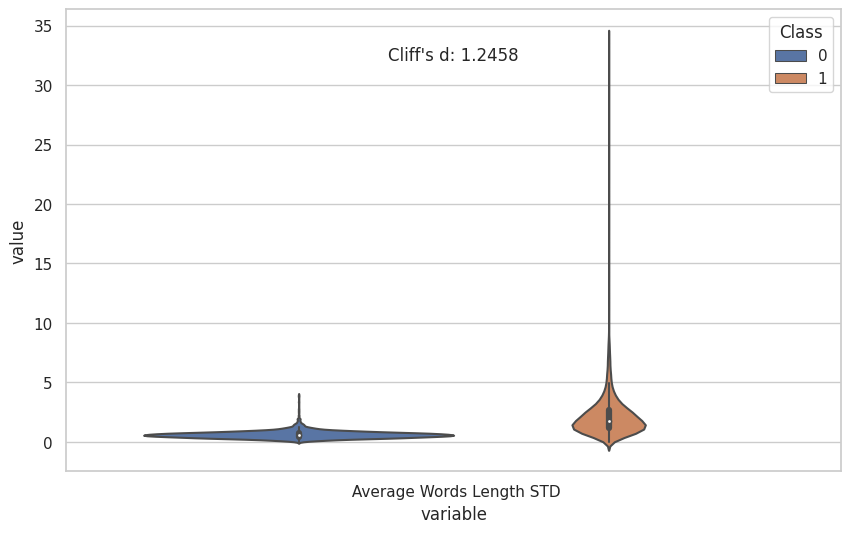

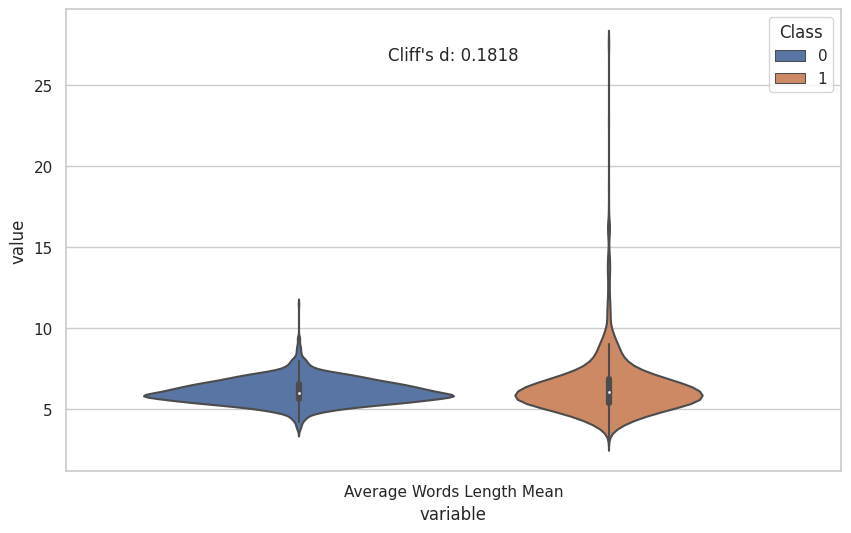

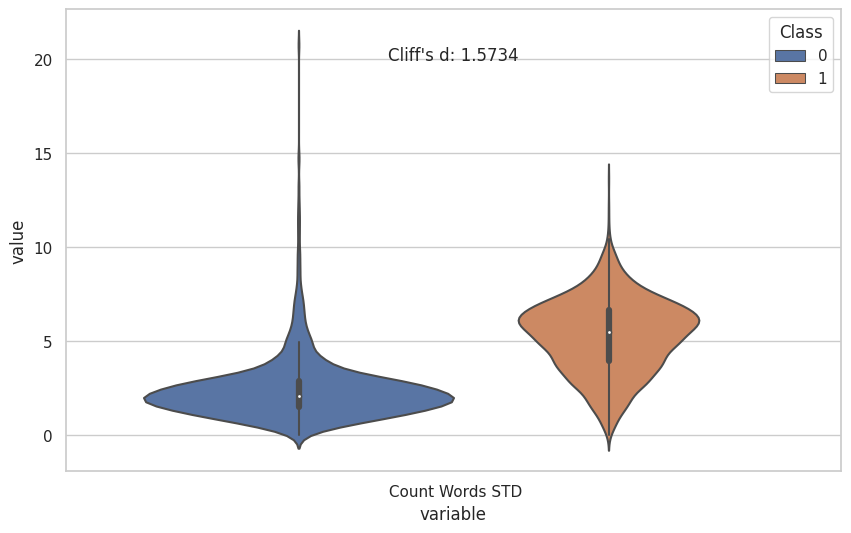

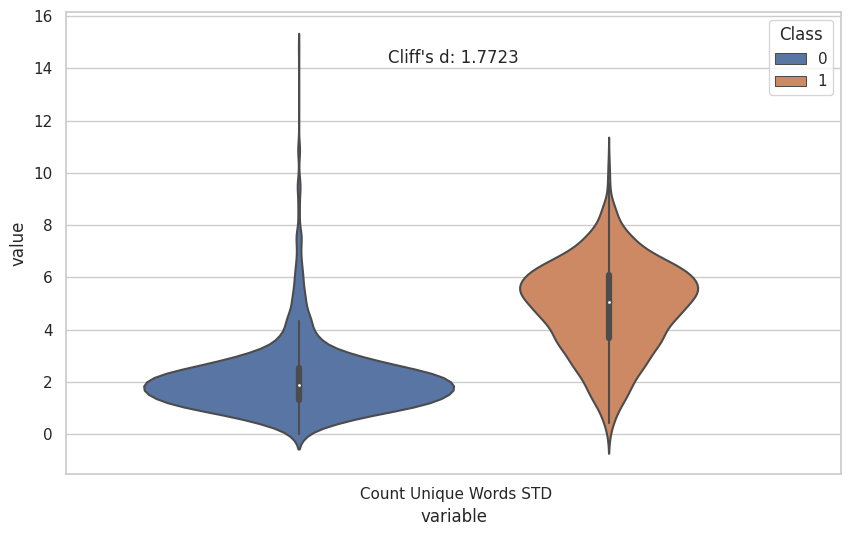

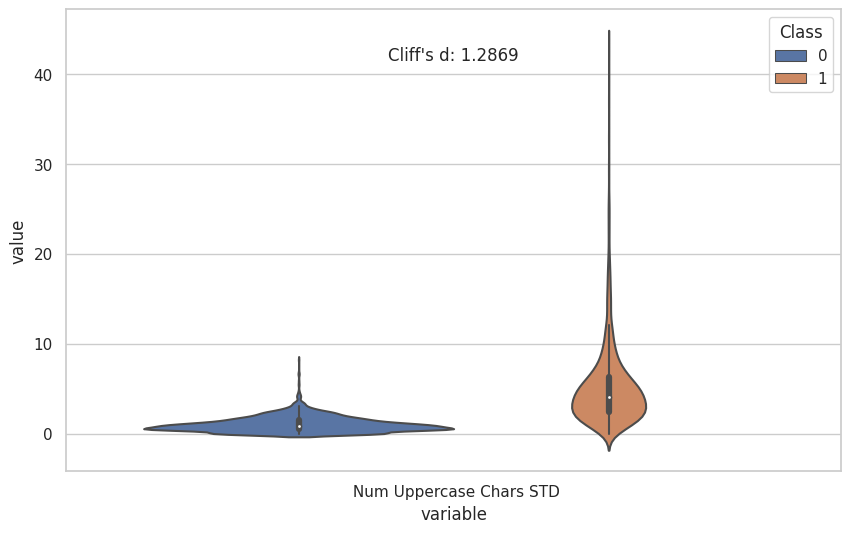

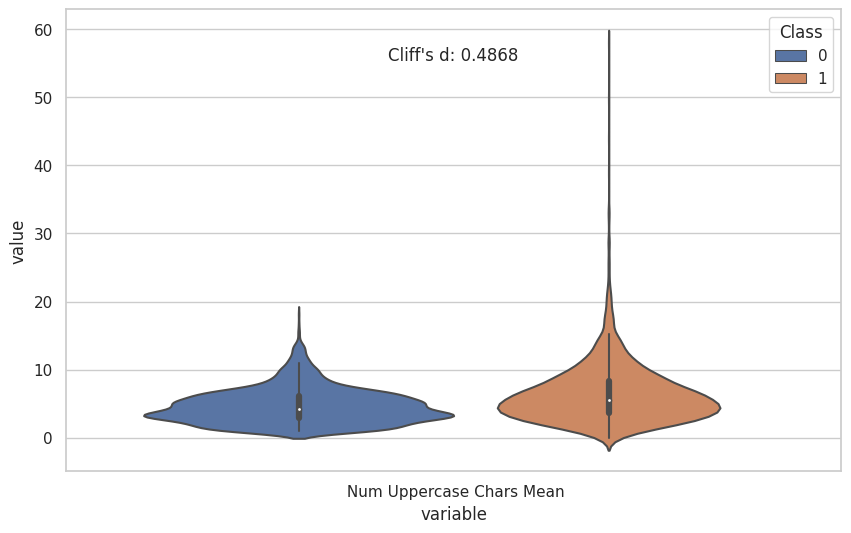

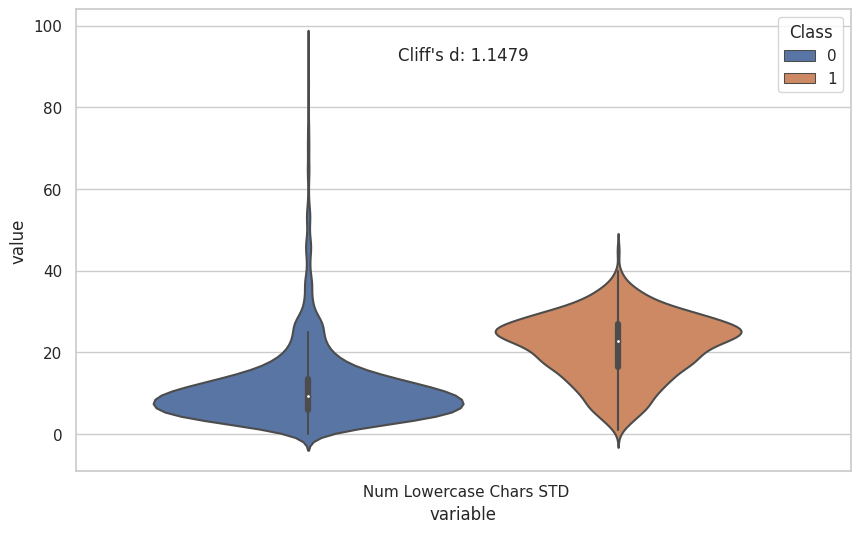

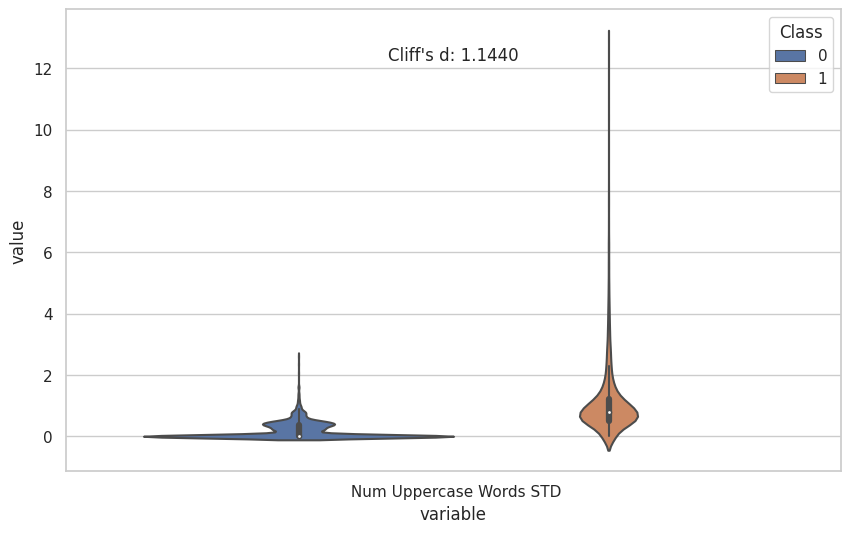

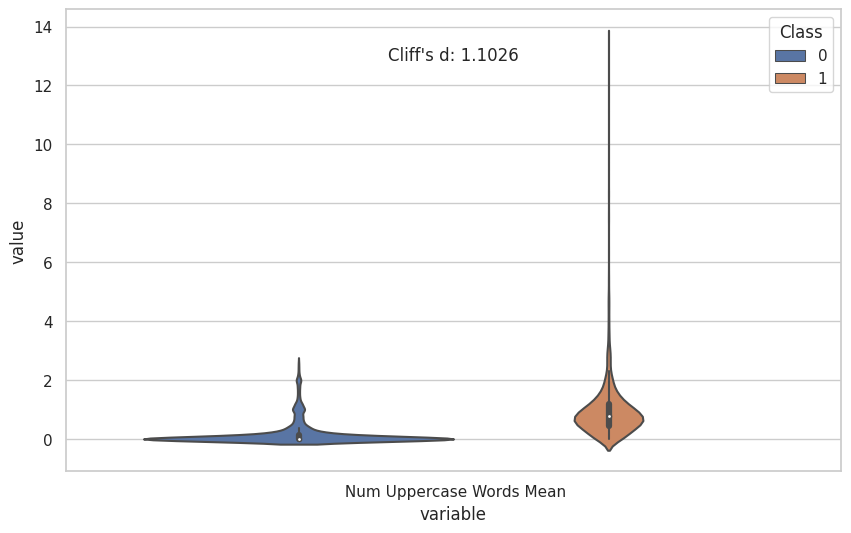

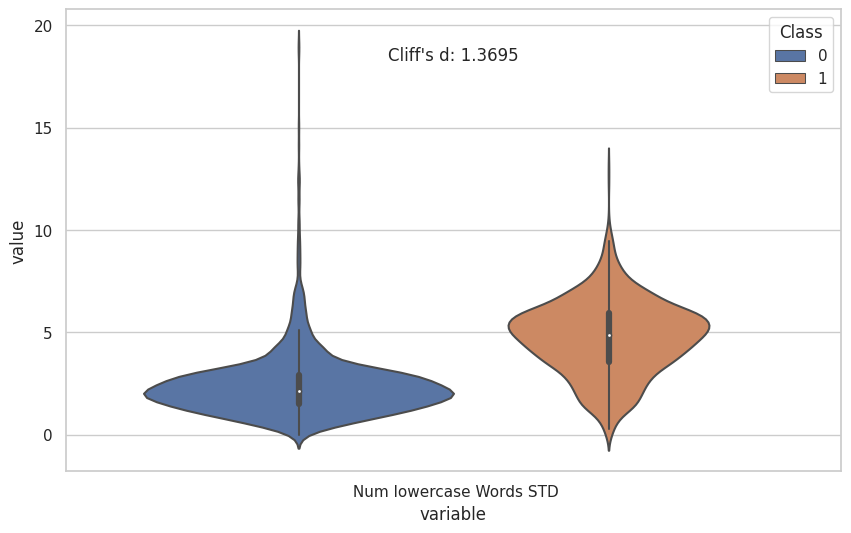

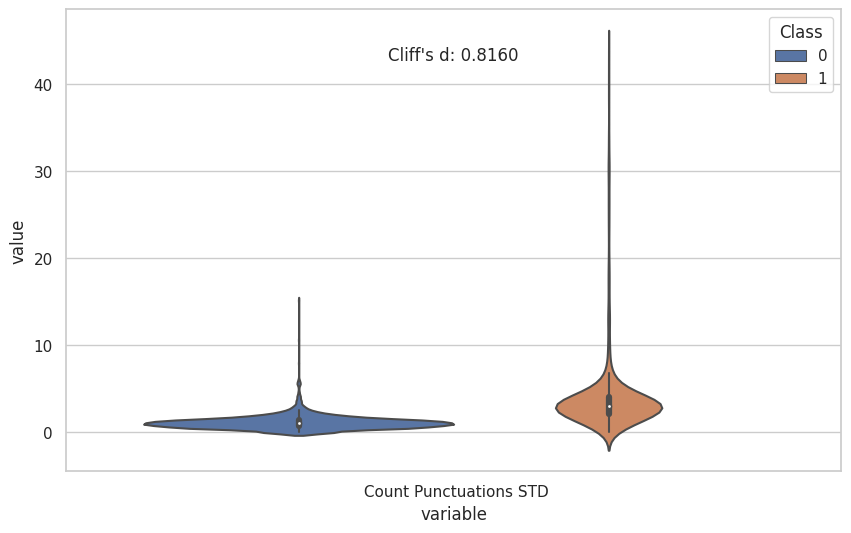

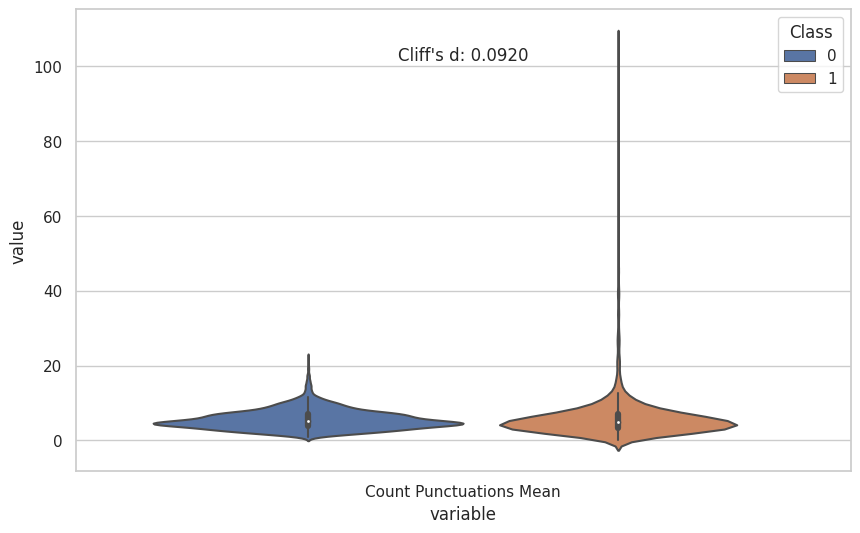

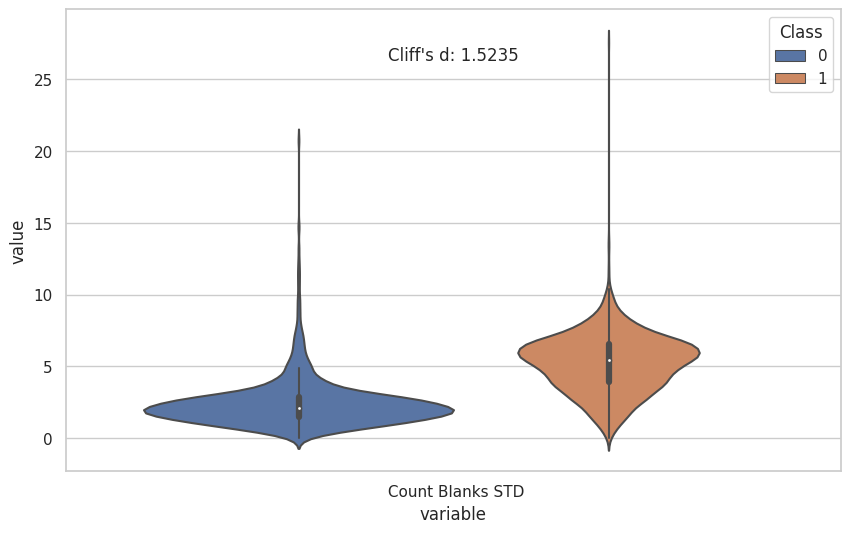

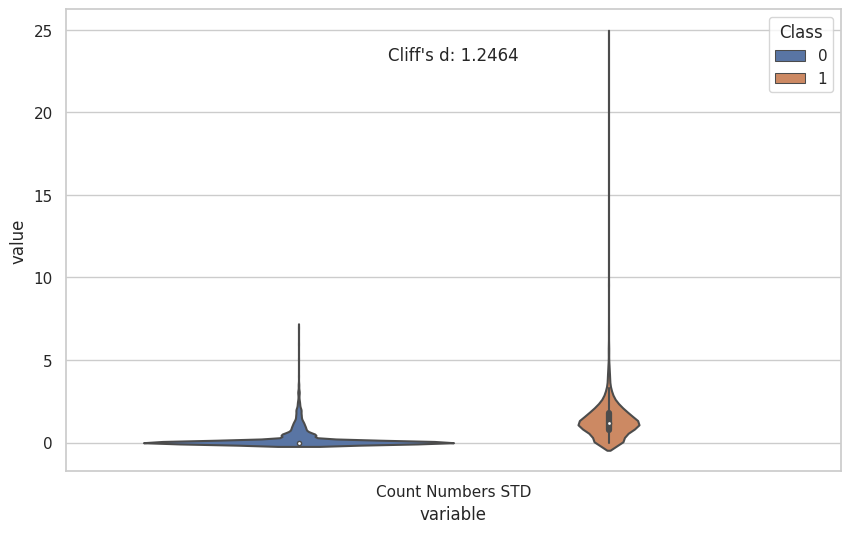

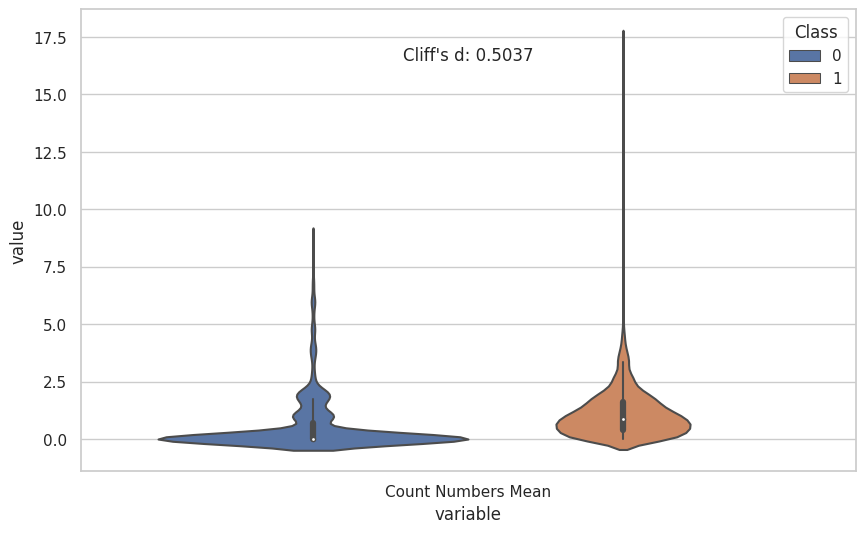

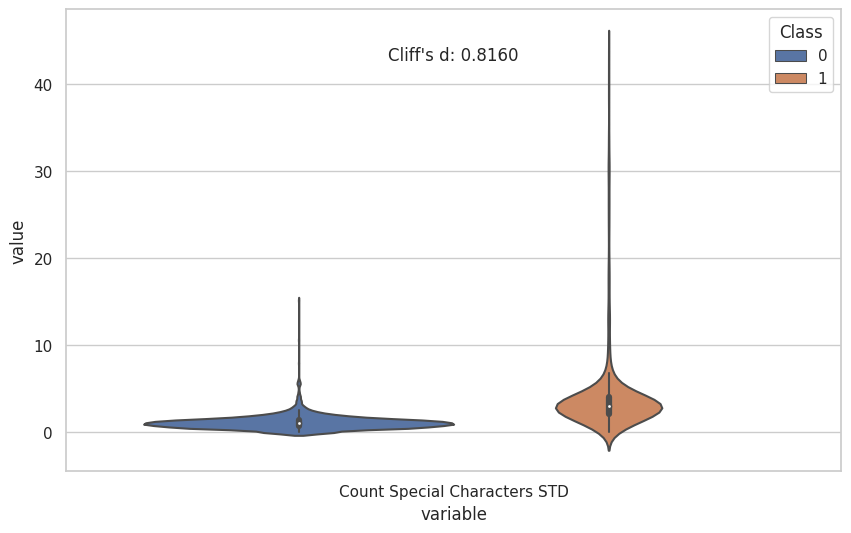

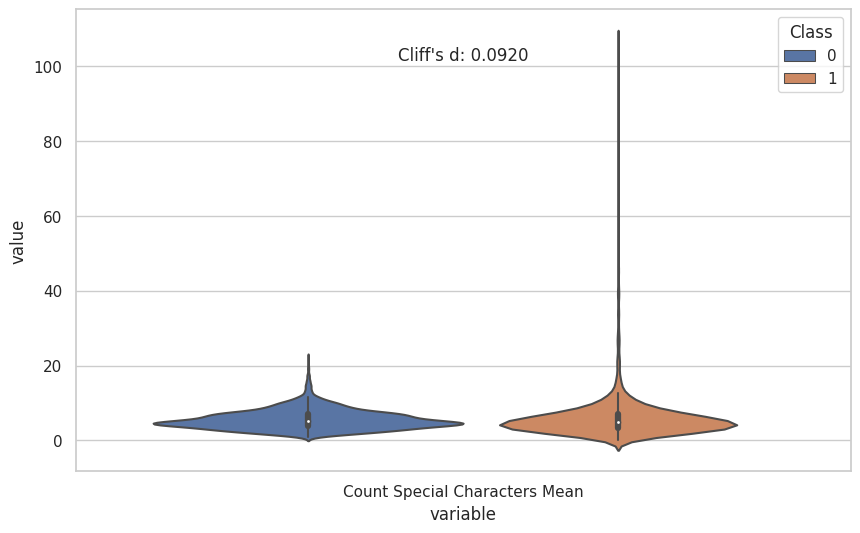

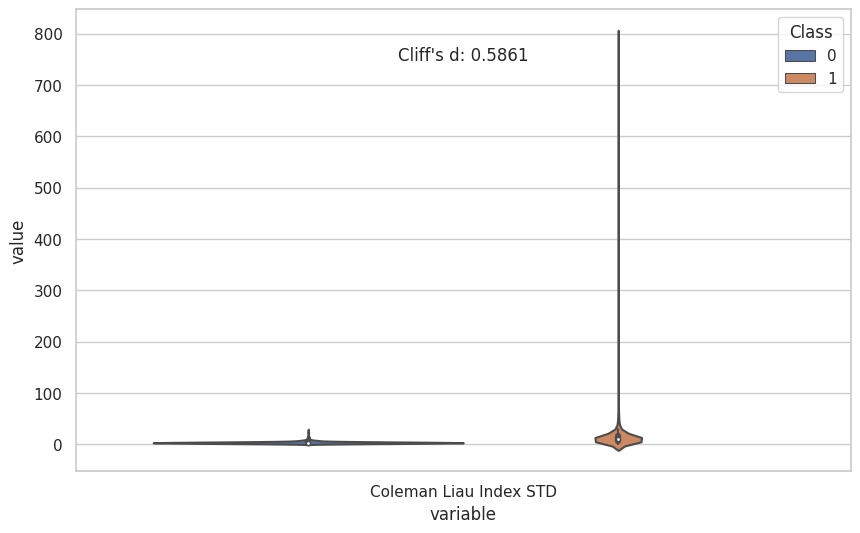

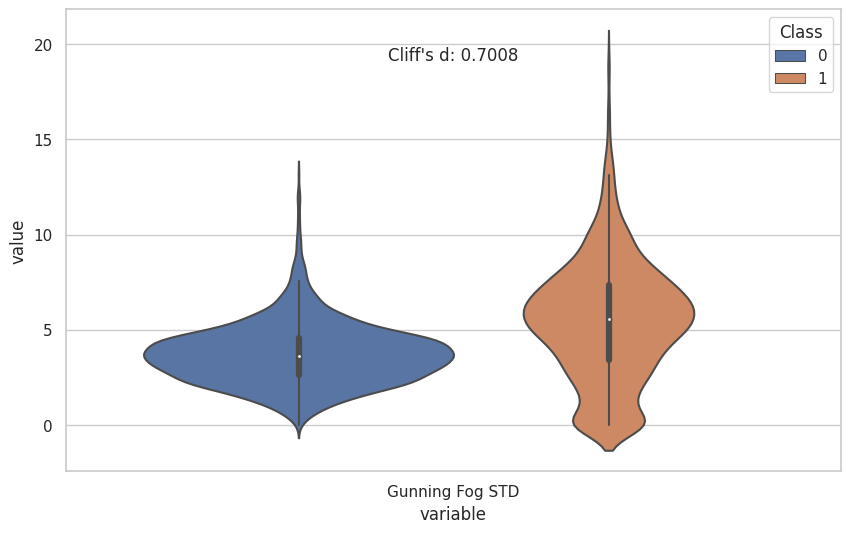

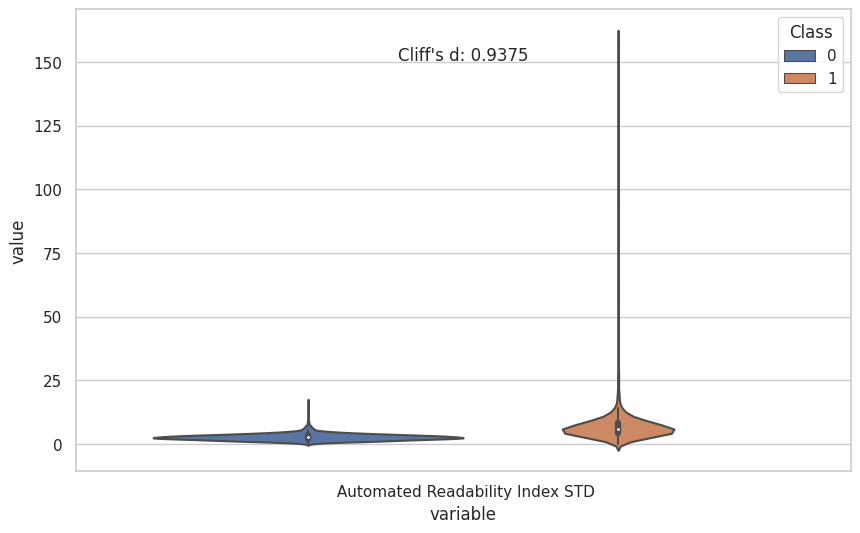

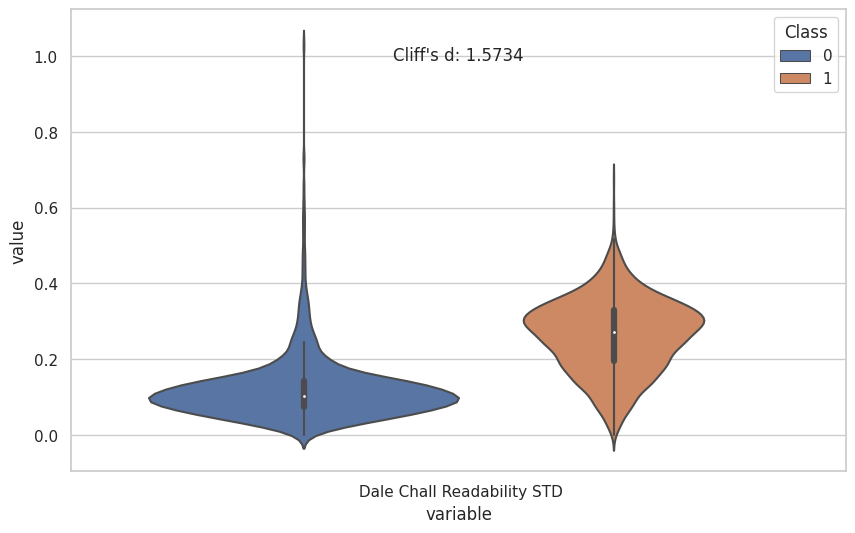

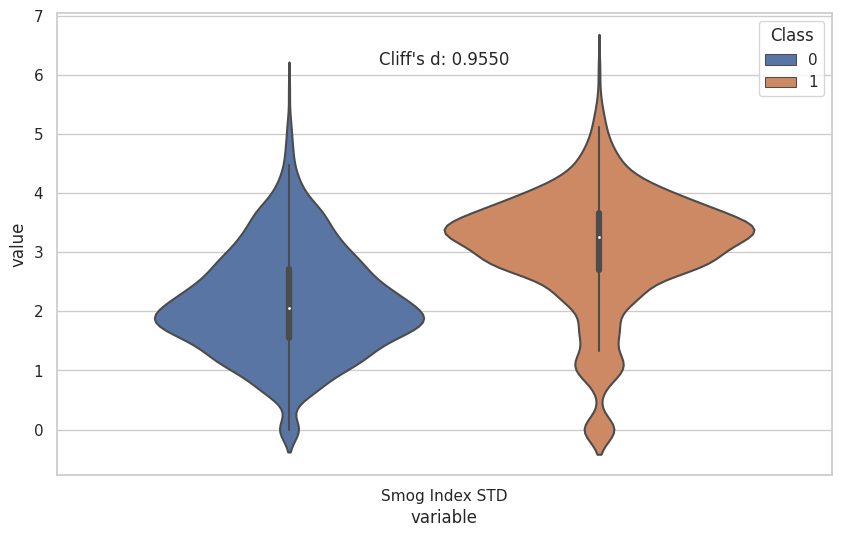

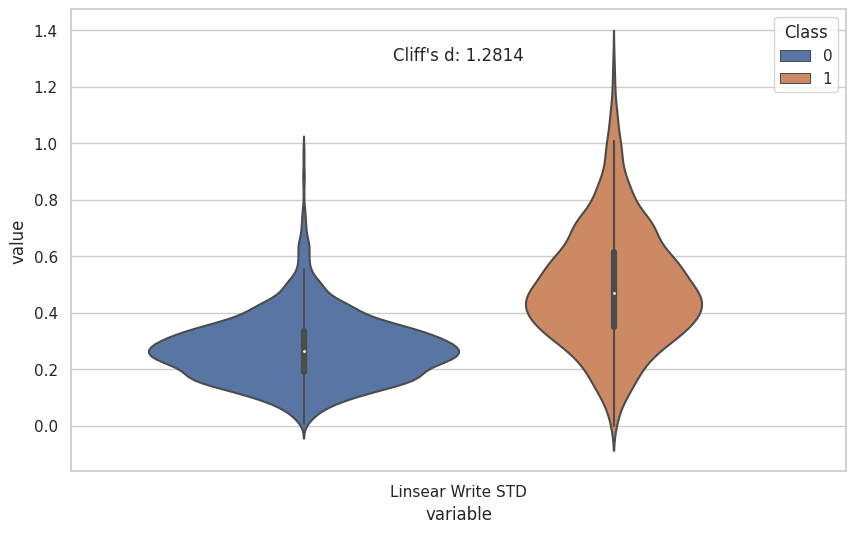

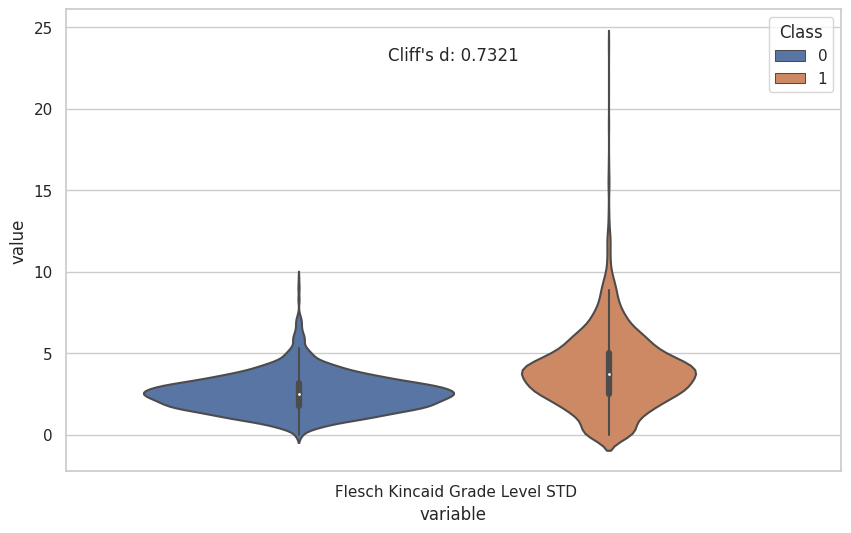

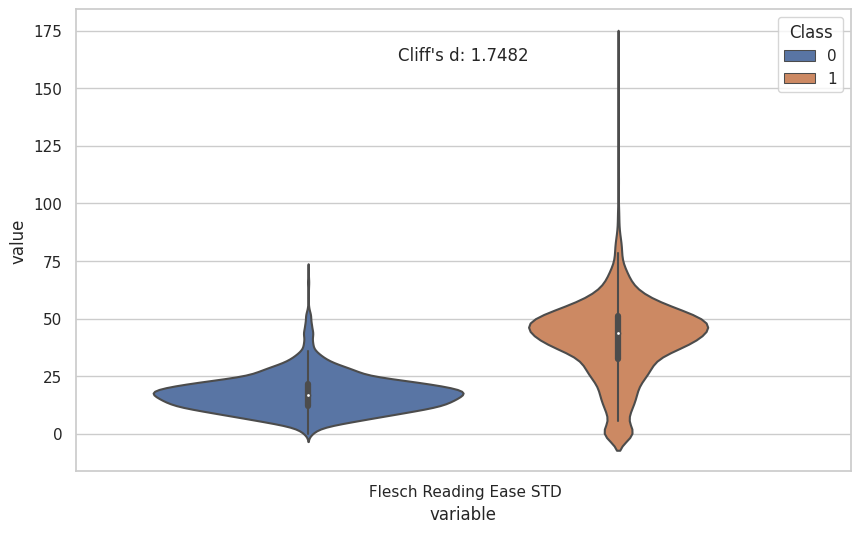

In [17]:
# Plotting the features capturing the CONSISTENCY


melted_data = pd.melt(data, id_vars=['Class'], value_vars=data.columns[1:43])

selected_features = []

plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")

for feature_name in data.columns[1:43]:
    melted_data_feature = melted_data[melted_data['variable'] == feature_name]

    if melted_data_feature[melted_data_feature['Class'] == 0]['value'].mean() < melted_data_feature[melted_data_feature['Class'] == 1]['value'].mean():
        _, p_value = stats.mannwhitneyu(melted_data_feature[melted_data_feature['Class'] == 0]['value'], melted_data_feature[melted_data_feature['Class'] == 1]['value'])
        d = abs(np.mean(melted_data_feature[melted_data_feature['Class'] == 0]['value']) - np.mean(melted_data_feature[melted_data_feature['Class'] == 1]['value'])) / np.sqrt((np.var(melted_data_feature[melted_data_feature['Class'] == 0]['value']) + np.var(melted_data_feature[melted_data_feature['Class'] == 1]['value'])) / 2)
        if d < 0.33:
            effect_size_label = "Small"
        elif 0.33 <= d < 0.474:
            effect_size_label = "Medium"
        else:
            effect_size_label = "Large"

        selected_features.append((feature_name, p_value, d, effect_size_label))

        plt.figure(figsize=(10, 6))
        sns.violinplot(x='variable', y='value', hue='Class', data=melted_data_feature)
        plt.text(0.5, 0.9, f"Cliff's d: {d:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
        class_counts = melted_data_feature.groupby(['Class']).size().reset_index(name='Count')
        plt.xticks(rotation=0)
        plt.savefig(f'/content/Violin_Plot_{feature_name}.png')
        plt.show()

# Save selected features to CSV file
selected_features_df = pd.DataFrame(selected_features, columns=['Feature', 'P-value', "Effect Size (Cliff's d)", 'Effect Size Label'])
selected_features_df.to_csv('/content/Selected_Features.csv', index=False)

